# Project Description

In machine learning, working with datasets that have numerous features but limited data points presents significant challenges. This project focuses on predicting student performance in a mathematics course using a dataset with diverse features that describe student demographics, family background, and academic history. Given the limited size of the dataset, our objective is to explore and compare different machine learning approaches to determine which techniques are most effective for this specific data setup.

Handling datasets with high-dimensional features but few observations can lead to issues such as overfitting and poor model generalization. Therefore, we aim to experiment with various preprocessing techniques, modeling strategies, and hyperparameter tuning methods to optimize performance on such datasets. This report will focus on analyzing the performance of different approaches and provide a brief explanation of the corresponding code implementations.

# Dataset Description

The dataset we are working with originates from a study that seeks to predict the final academic performance of secondary school students. It contains a variety of features, both numerical and categorical, that provide insight into each student's background and academic behavior. The dataset includes:

- **Numerical Features**: Attributes like student age, absences, and combined parental education levels, which provide continuous or count-based information.
- **Categorical Features**: Attributes like school type, gender, address type (urban or rural), and family support, which represent specific groups or categories.
- **Ordinal Features**: Some features, such as travel time to school and study time, are ordinal, meaning they represent ordered categories. While these are often treated as numerical in machine learning models, they do not carry a true numerical difference between the values.

The target variable in the training dataset is **G3**, which represents the final grade of students in mathematics. However, the test dataset lacks this target column, meaning we need to build models that accurately predict **G3** for the test set based on the available features.


In [1]:
import pandas as pd


train_path = "D:/Desktop/python/train(3).csv"
test_path = "D:/Desktop/python/test(3).csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)


print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())


print("\nTrain Data Description:")
print(train_data.describe())

print("\nTest Data Description:")
print(test_data.describe())


Train Data Shape: (359, 33)
Test Data Shape: (36, 32)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      359 non-null    object
 1   sex         359 non-null    object
 2   age         359 non-null    int64 
 3   address     359 non-null    object
 4   famsize     359 non-null    object
 5   Pstatus     359 non-null    object
 6   Medu        359 non-null    int64 
 7   Fedu        359 non-null    int64 
 8   Mjob        359 non-null    object
 9   Fjob        359 non-null    object
 10  reason      359 non-null    object
 11  guardian    359 non-null    object
 12  traveltime  359 non-null    int64 
 13  studytime   359 non-null    int64 
 14  failures    359 non-null    int64 
 15  schoolsup   359 non-null    object
 16  famsup      359 non-null    object
 17  paid        359 non-null    object
 18  activities  359 no

# Initial Data Overview

Upon examining the dataset, several insights and patterns emerged that highlight potential challenges and areas of focus in our analysis. This section will explore key differences between the training and test datasets, as well as imbalances and skewed distributions within certain features.

## 1. Training vs. Test Data Differences

One of the primary observations is that the test dataset is significantly smaller than the training dataset. While the training dataset contains 359 records, the test dataset includes only 36 records. This discrepancy in size is a notable challenge for model evaluation, as a smaller test set increases the risk of bias in assessing model performance.

Additionally, the test and training datasets show similarities in terms of statistical properties such as mean, standard deviation, and min/max values for most numerical features. The similar distributions in both datasets indicate that the test set represents a consistent subset of the training data. For instance, the mean age of students in both datasets is close, and the distributions of absences and health are relatively aligned, though the test set exhibits slightly lower variance in certain features like absences.



## 2. Imbalanced Features

Several features in the dataset exhibit a high degree of imbalance, which could impact the model’s ability to learn effectively:

- **School Type**: In both the training and test sets, a large majority of students belong to the 'GP' school (approximately 88% in training and 91.6% in the test set). This imbalance means the model will have limited information on students from the 'MS' school, potentially leading to biased predictions for this subgroup.

- **Parent Status (Pstatus)**: Nearly 90% of students in both the training and test datasets live with both parents, with only about 10% living apart. This could make it difficult for the model to learn differences in outcomes between students based on their parental cohabitation status.

- **Study Time**: A majority of students report a moderate amount of study time (between 2 to 5 hours per week), with over 50% in both datasets falling into this category. However, very few students study more than 10 hours per week, potentially limiting the model's understanding of how extensive study time affects final grades.

## 3. Ordinal Features Treated as Numerical

While features like travel time and study time are ordinal in nature (i.e., the values represent ordered categories), they are often treated as numerical data for the purposes of machine learning models. This simplification is common but can lead to inaccuracies if the model assumes that differences between categories are linear. For example, the difference between “1: less than 15 minutes” and “2: 15 to 30 minutes” for travel time may not be equivalent to the difference between “3: 30 minutes to 1 hour” and “4: more than 1 hour.”

## 4. Distributions and Skewed Data

Several features show highly skewed distributions:

- **Failures**: The vast majority of students (over 78% in the training set) have not failed any classes, while very few students report multiple failures. This imbalance may result in a model that struggles to predict outcomes for students with high failure rates, as the data is heavily weighted toward students with no prior failures.

- **Alcohol Consumption**: Both workday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) exhibit skewed distributions, with most students reporting very low consumption. Nearly 70% of students in the training set report the lowest level of alcohol consumption during workdays, while a slightly larger spread exists for weekend consumption.

## 5. Target Variable Distribution

The distribution of the target variable, **G3**, shows that a large proportion of students achieve grades between 8 and 13, with the mean around 10.34. However, a significant number of students score below 5, including some with a grade of 0. This creates a somewhat bimodal distribution, which could complicate the prediction task, as the model will need to account for both high and low outliers.

## 6. Lack of Severe Imbalance

Despite some noticeable imbalances, especially in school type and parental status, no extreme imbalances exist that would drastically skew model learning. Features such as gender and famsize are well-represented, ensuring that the model has a diverse range of data to learn from.

However, notable imbalances and skewness within certain features must be accounted for in preprocessing to ensure the model can generalize well to both high-performing and underperforming students.


In [2]:
print("Missing values in train data:")
print(train_data.isnull().sum())

print("\nMissing values in test data:")
print(test_data.isnull().sum())


print("\nDuplicate rows in train data:")
print(train_data.duplicated().sum())

print("\nDuplicate rows in test data:")
print(test_data.duplicated().sum())

# Get value counts for each column 
for column in train_data.columns:
    print(f"\nValue counts for {column} in train data:")
    print(train_data[column].value_counts(normalize=True))  

# in the testing dataset
for column in test_data.columns:
    print(f"\nValue counts for {column} in test data:")
    print(test_data[column].value_counts(normalize=True))  


Missing values in train data:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Missing values in test data:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0

Baseline RMSE: 1.9693537016708993


C:\Users\USER\AppData\Local\Temp\ipykernel_24524\947963465.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[imp[1] for imp in sorted_importances], y=[imp[0] for imp in sorted_importances], palette="viridis")


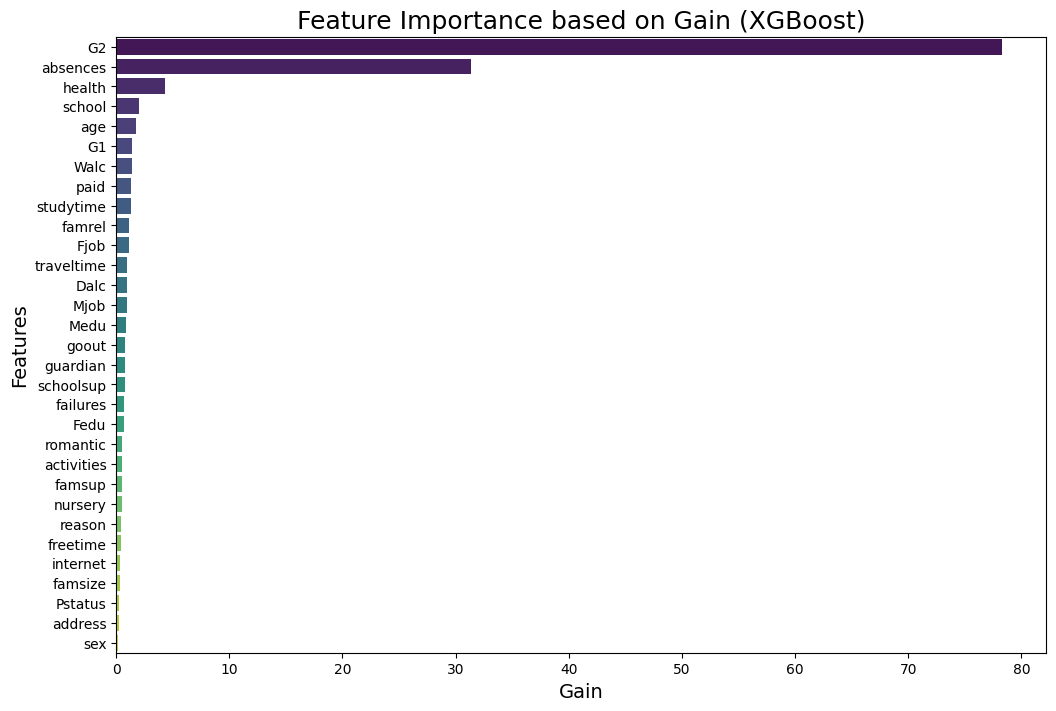

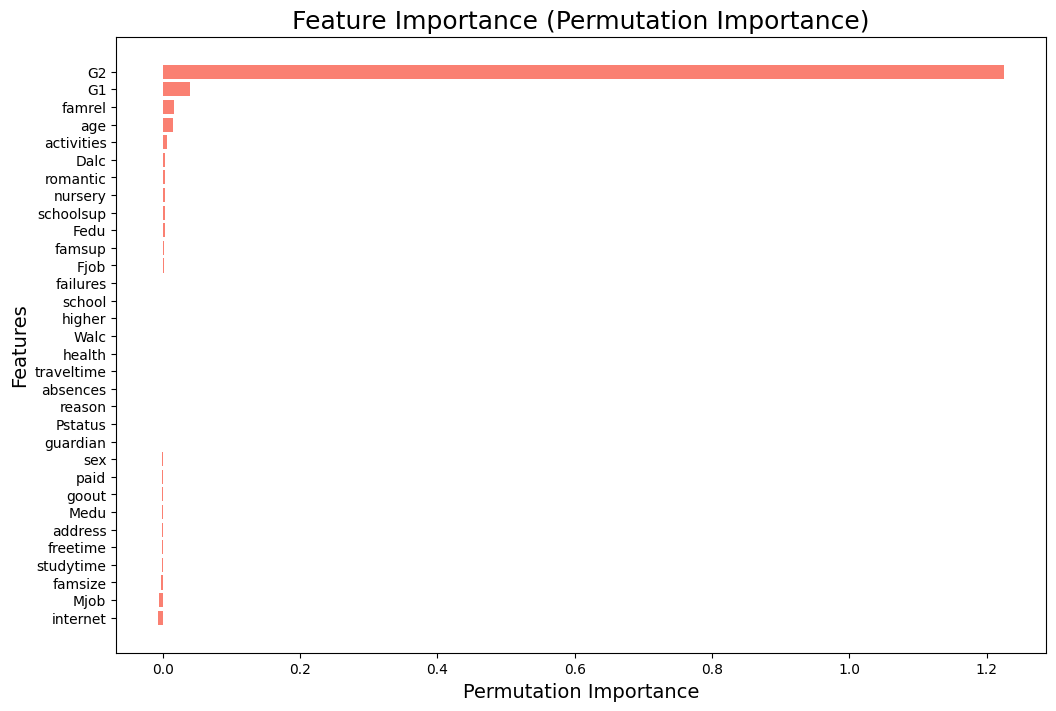

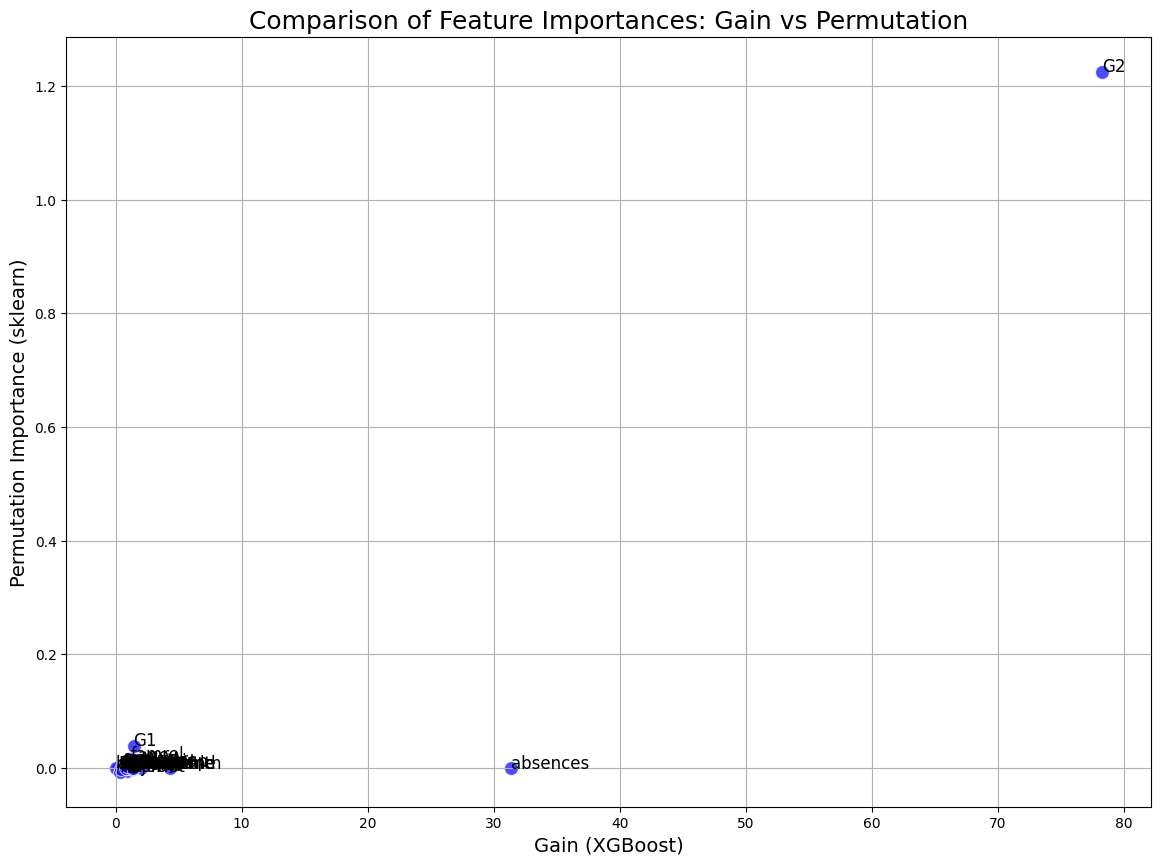

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_data_copy = train_data.copy()


label_encoder = LabelEncoder()


for column in train_data_copy.select_dtypes(include=['object']).columns:
    train_data_copy[column] = label_encoder.fit_transform(train_data_copy[column])

X = train_data_copy.drop('G3', axis=1)
y = train_data_copy['G3']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)


rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Baseline RMSE: {rmse}")

# روش اول: محاسبه اهمیت ویژگی‌ها بر اساس گین با استفاده از XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb_model.fit(X_train, y_train)


xgb_importances = xgb_model.get_booster().get_score(importance_type='gain')
sorted_importances = sorted(xgb_importances.items(), key=lambda x: x[1], reverse=True)


plt.figure(figsize=(12, 8))
sns.barplot(x=[imp[1] for imp in sorted_importances], y=[imp[0] for imp in sorted_importances], palette="viridis")
plt.title('Feature Importance based on Gain (XGBoost)', fontsize=18)
plt.xlabel('Gain', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

perm_importance = permutation_importance(model, X_val, y_val, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()


plt.figure(figsize=(12, 8))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color="salmon")
plt.xlabel("Permutation Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.title("Feature Importance (Permutation Importance)", fontsize=18)
plt.show()


plt.figure(figsize=(14, 10))


gain_importances = [xgb_importances.get(f, 0) for f in X.columns]
perm_importances = perm_importance.importances_mean

# رسم نمودار
sns.scatterplot(x=gain_importances, y=perm_importances, s=100, color="blue", alpha=0.7)
for i in range(len(X.columns)):
    plt.text(gain_importances[i], perm_importances[i], X.columns[i], fontsize=12)
plt.xlabel("Gain (XGBoost)", fontsize=14)
plt.ylabel("Permutation Importance (sklearn)", fontsize=14)
plt.title("Comparison of Feature Importances: Gain vs Permutation", fontsize=18)
plt.grid(True)
plt.show()


In [5]:
import pandas as pd


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")


numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()


for col in numeric_cols:
    min_value = train_data[col].min()
    max_value = train_data[col].max()
    print(f"Feature: {col}, Min: {min_value}, Max: {max_value}")


Feature: age, Min: 15, Max: 22
Feature: Medu, Min: 0, Max: 4
Feature: Fedu, Min: 0, Max: 4
Feature: traveltime, Min: 1, Max: 4
Feature: studytime, Min: 1, Max: 4
Feature: failures, Min: 0, Max: 3
Feature: famrel, Min: 1, Max: 5
Feature: freetime, Min: 1, Max: 5
Feature: goout, Min: 1, Max: 5
Feature: Dalc, Min: 1, Max: 5
Feature: Walc, Min: 1, Max: 5
Feature: health, Min: 1, Max: 5
Feature: absences, Min: 0, Max: 75
Feature: G1, Min: 3, Max: 19
Feature: G2, Min: 0, Max: 19
Feature: G3, Min: 0, Max: 19


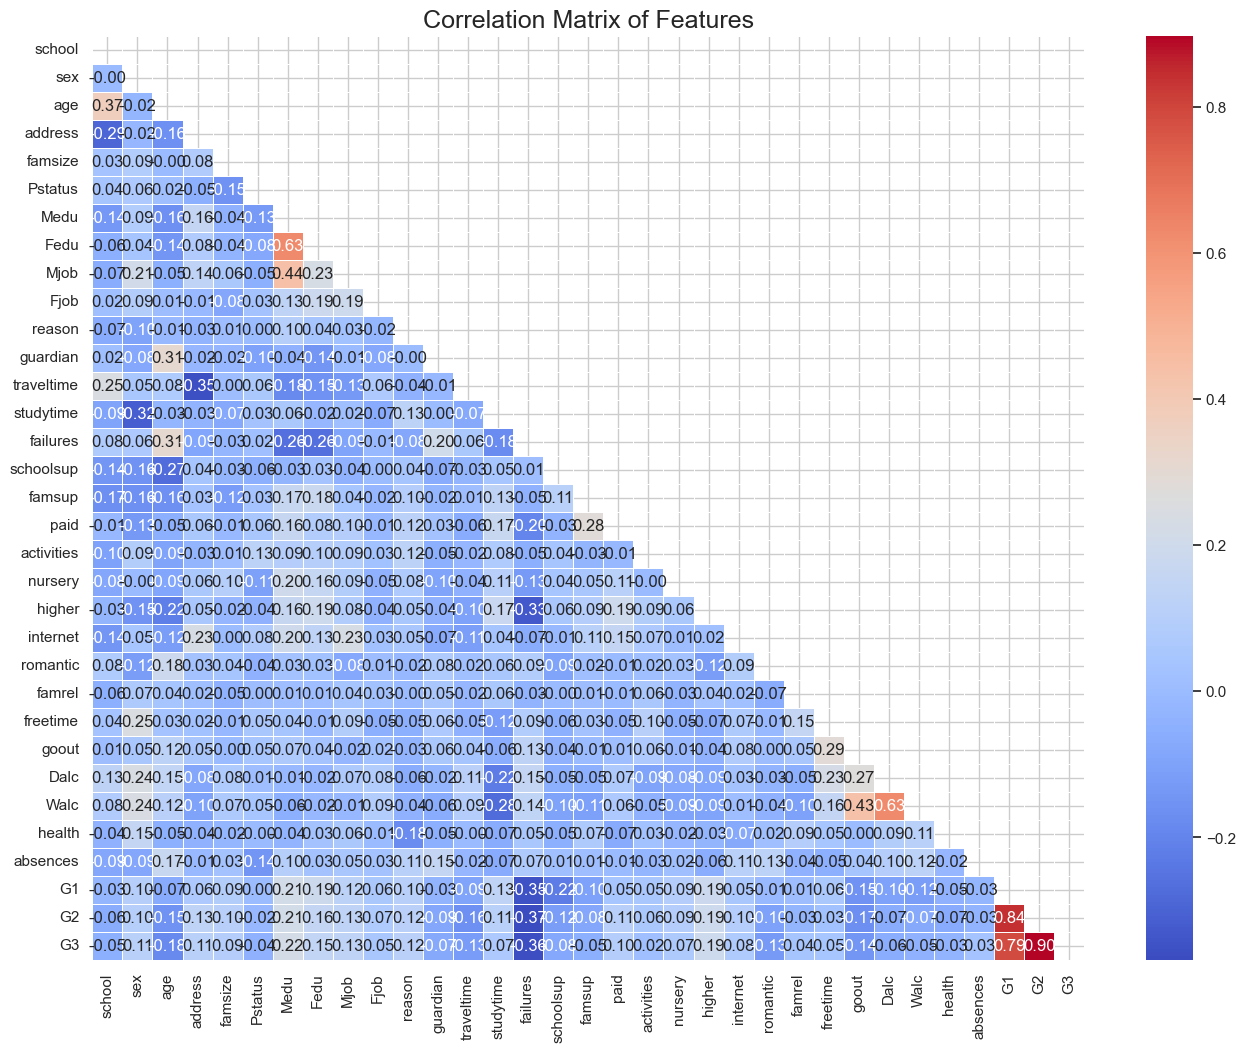

Top Positive Correlations:
 G3    G2      0.897952
G2    G1      0.843225
G1    G3      0.786249
Fedu  Medu    0.627182
Walc  Dalc    0.627134
dtype: float64

Top Negative Correlations:
 Series([], dtype: float64)


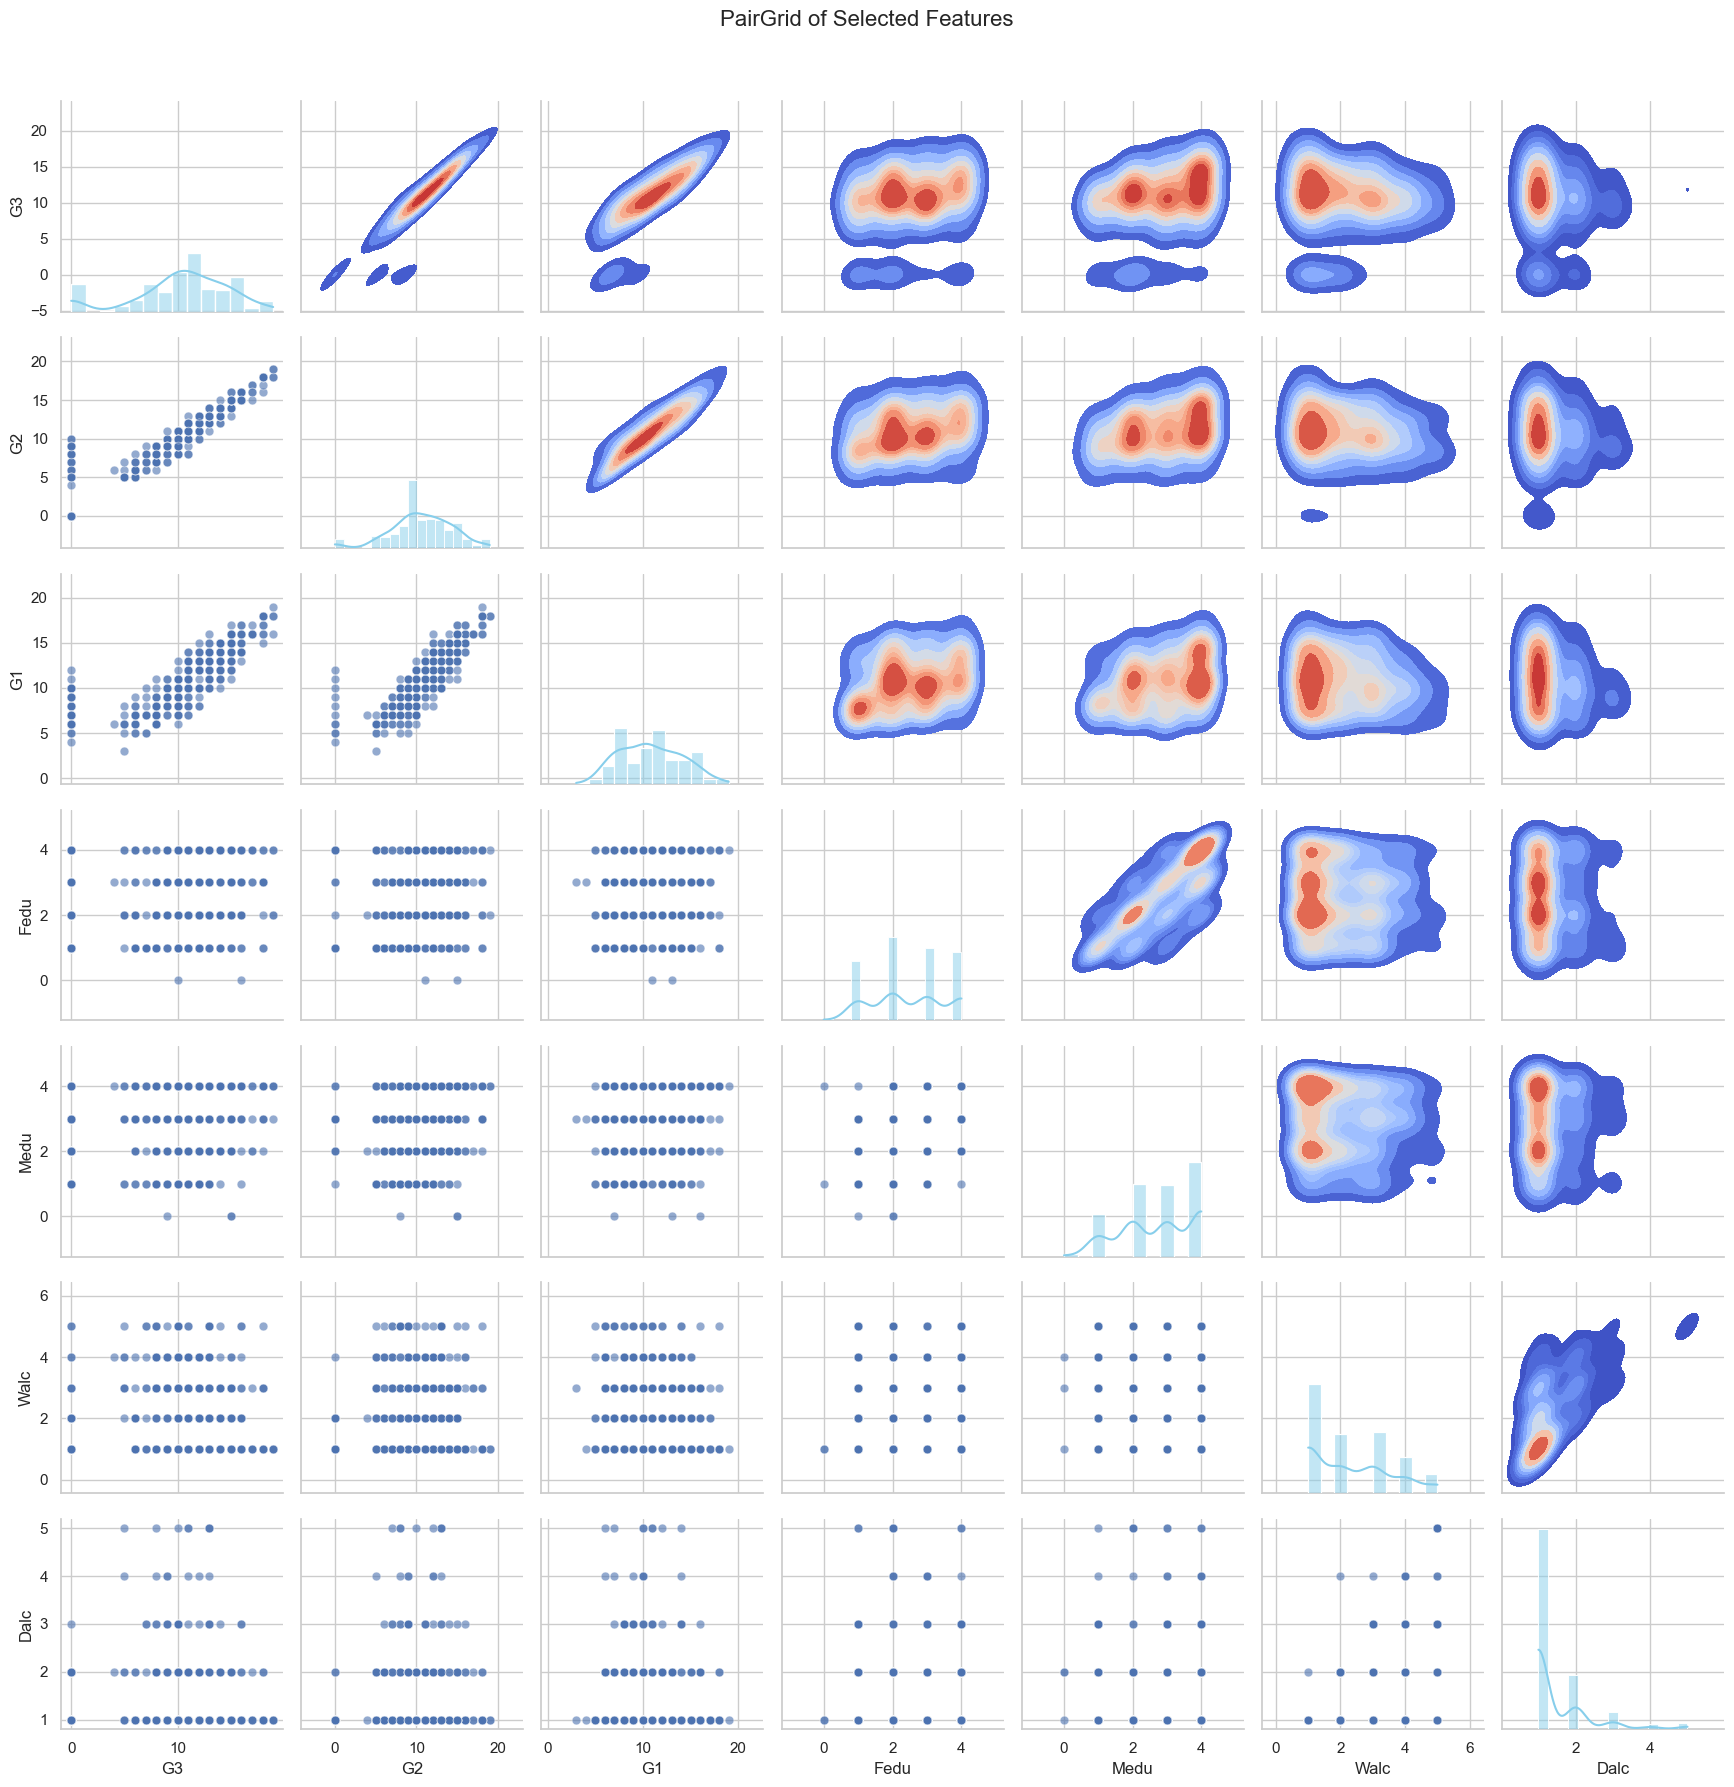

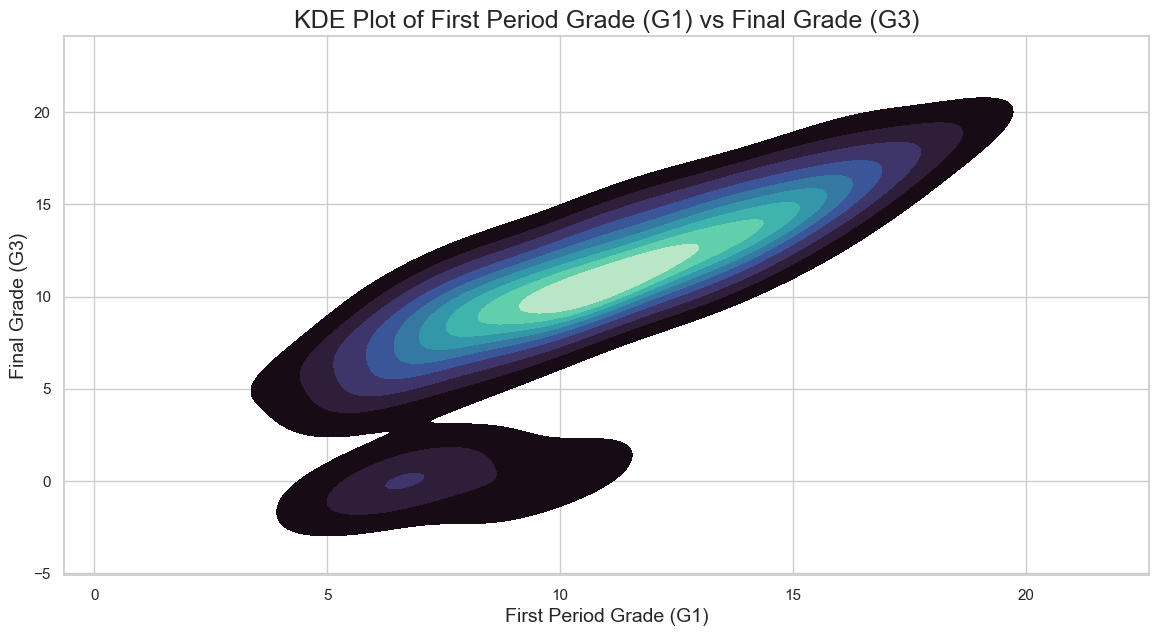

C:\Users\USER\AppData\Local\Temp\ipykernel_8380\2826743415.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=train_data['famsize'], y='G3', data=processed_df, inner="quartile", palette="muted")


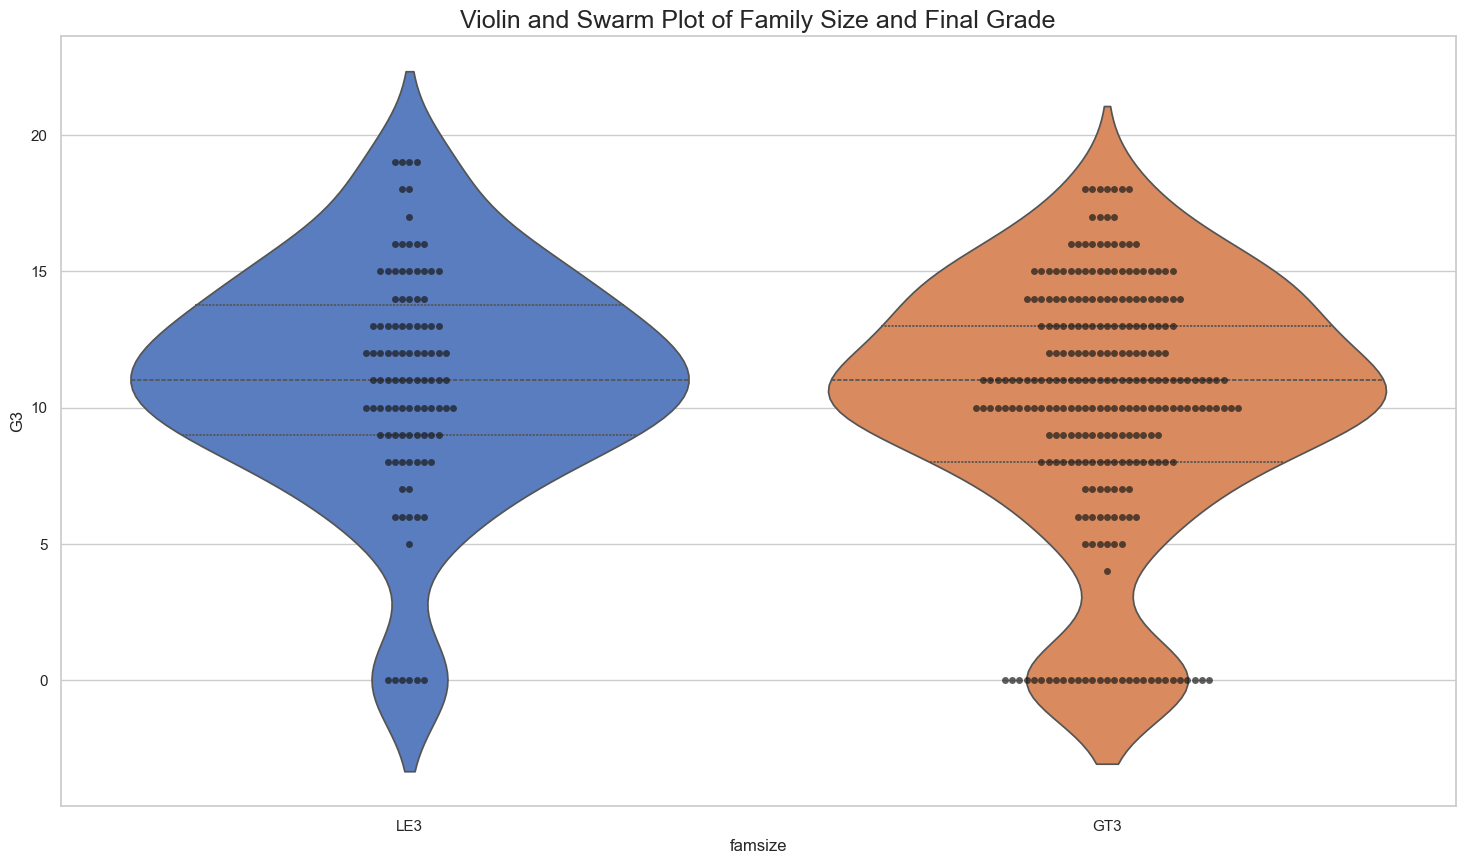

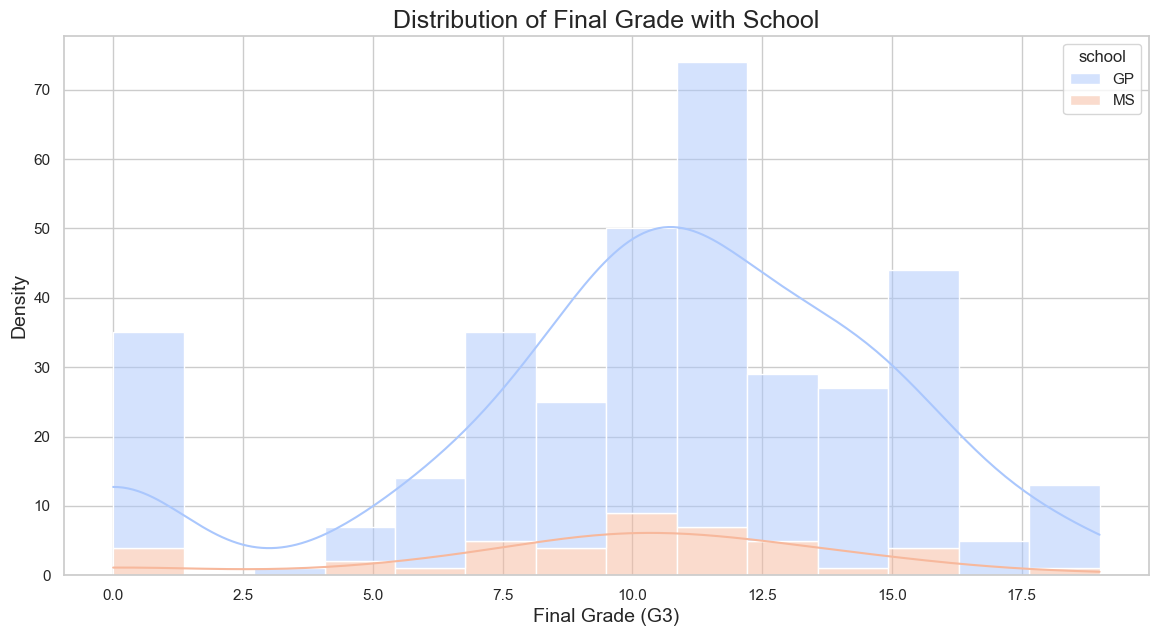

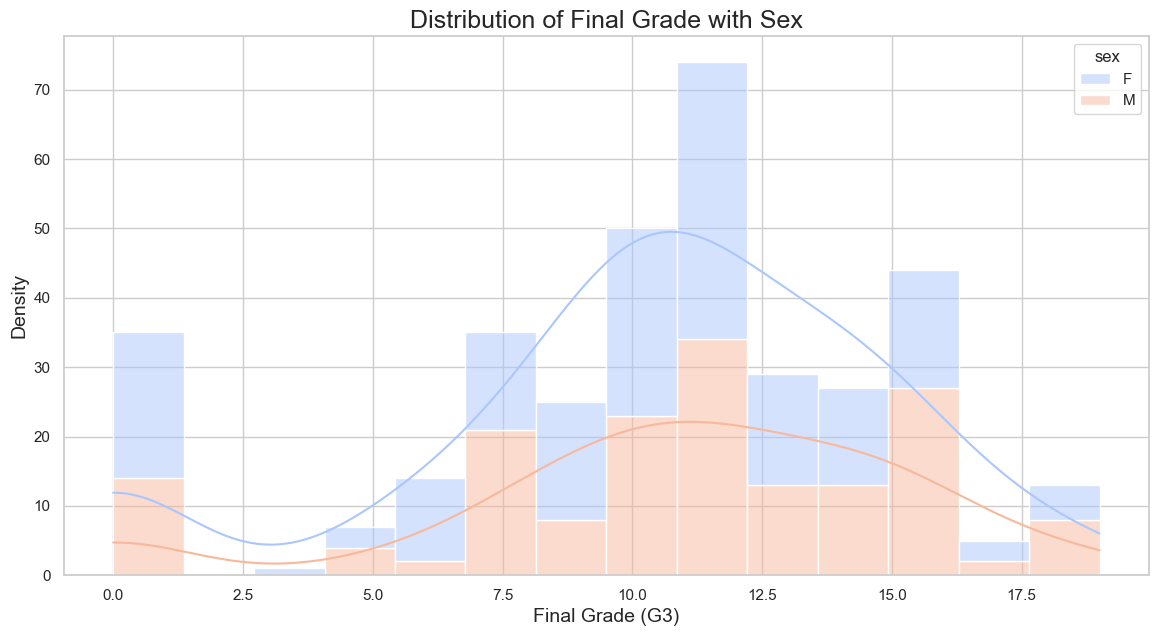

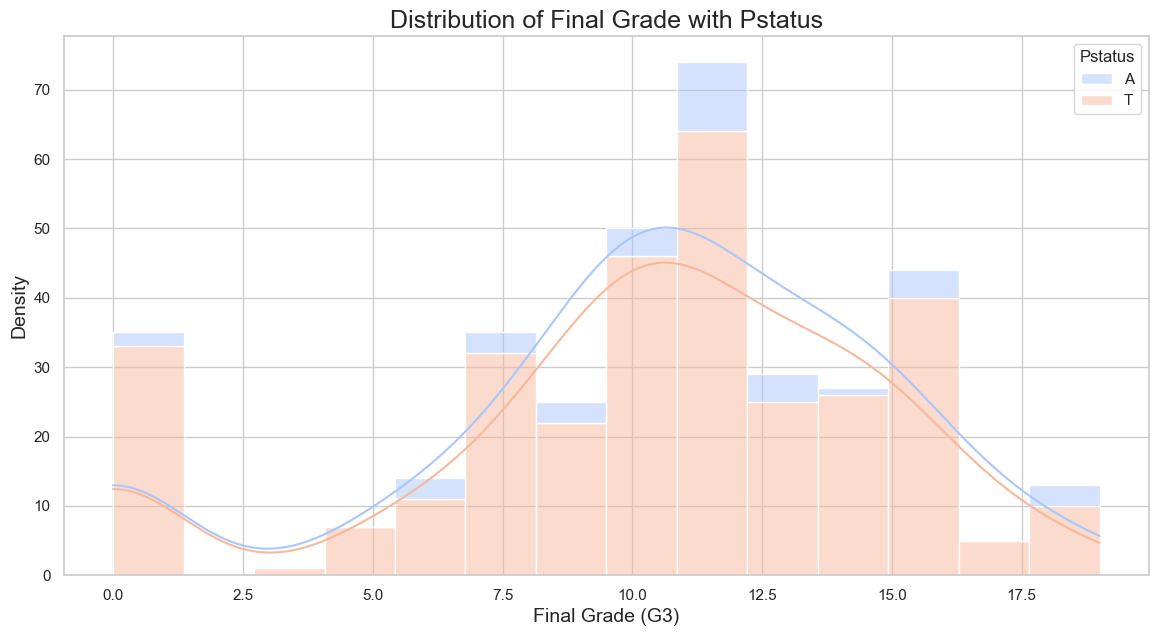

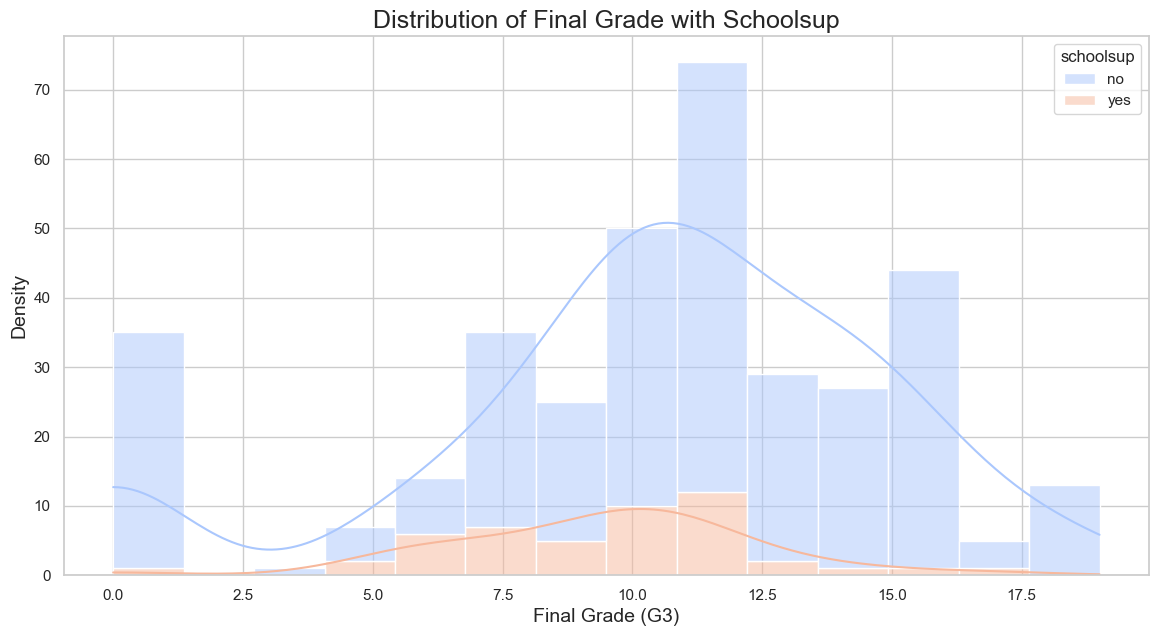

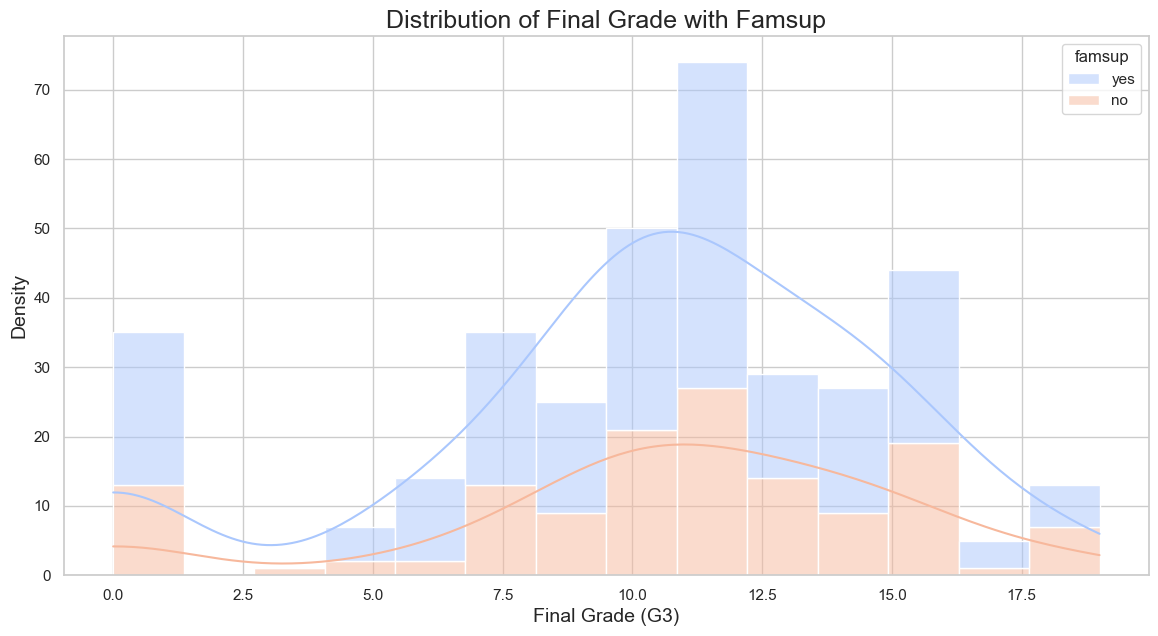

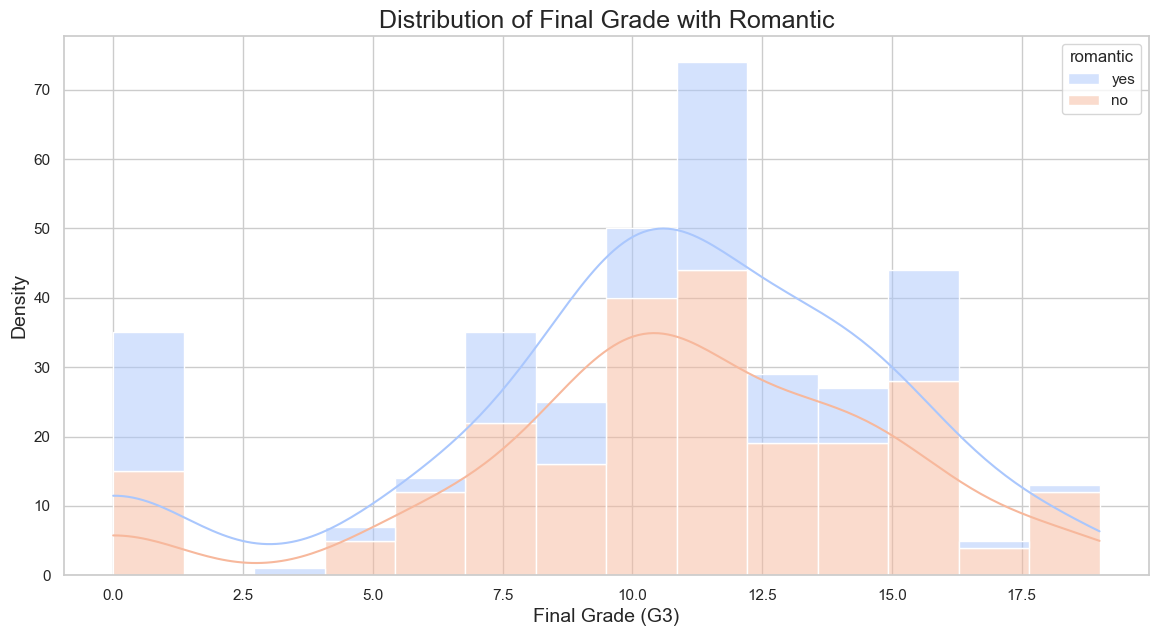

C:\Users\USER\AppData\Local\Temp\ipykernel_8380\2826743415.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="G3", y="age", data=processed_df, palette="muted")  # جای G3 و age با ستون‌های مورد نظر شما جایگزین شود


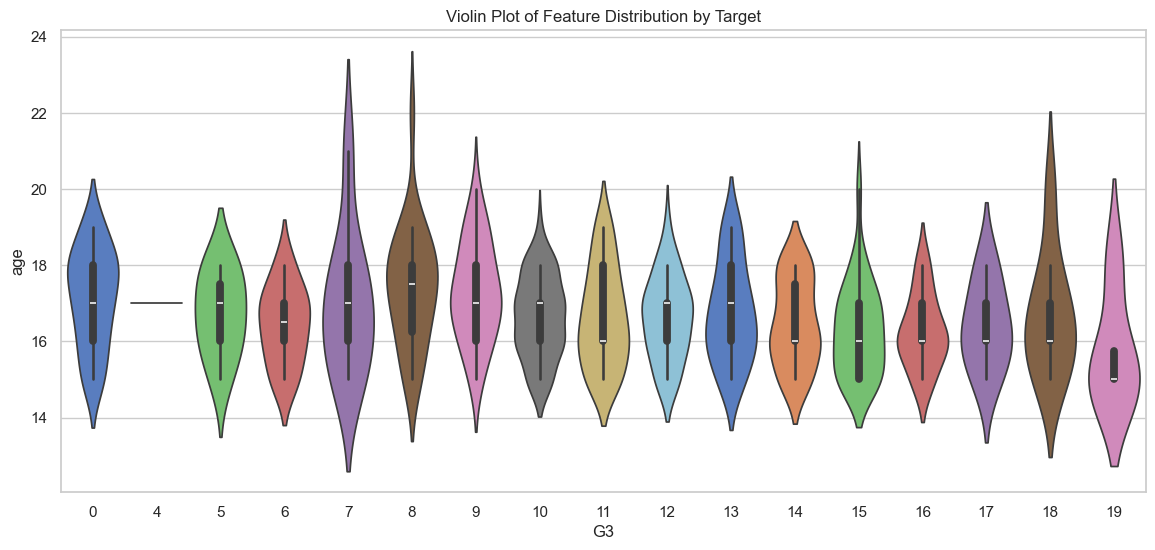

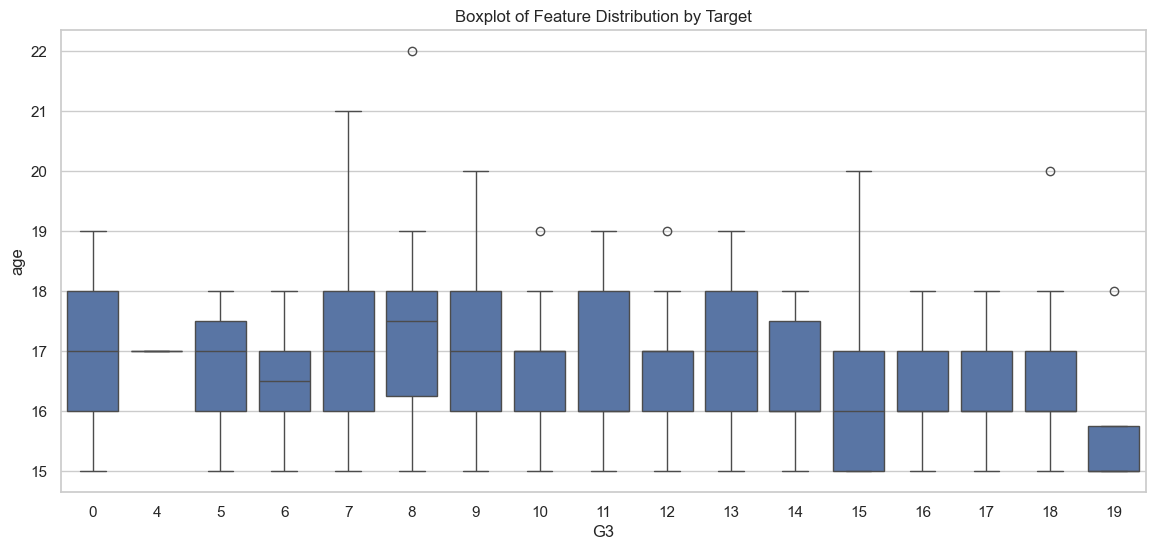

C:\Users\USER\AppData\Local\Temp\ipykernel_8380\2826743415.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Medu', y='G3', data=processed_df, palette="viridis", ax=ax1)
C:\Users\USER\AppData\Local\Temp\ipykernel_8380\2826743415.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fedu', y='G3', data=processed_df, palette="magma", ax=ax2)
C:\Users\USER\AppData\Local\Temp\ipykernel_8380\2826743415.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='studytime', y='G3', data=processed_df, palette="cool", ax=ax3)
C:\Users\USER\Ap

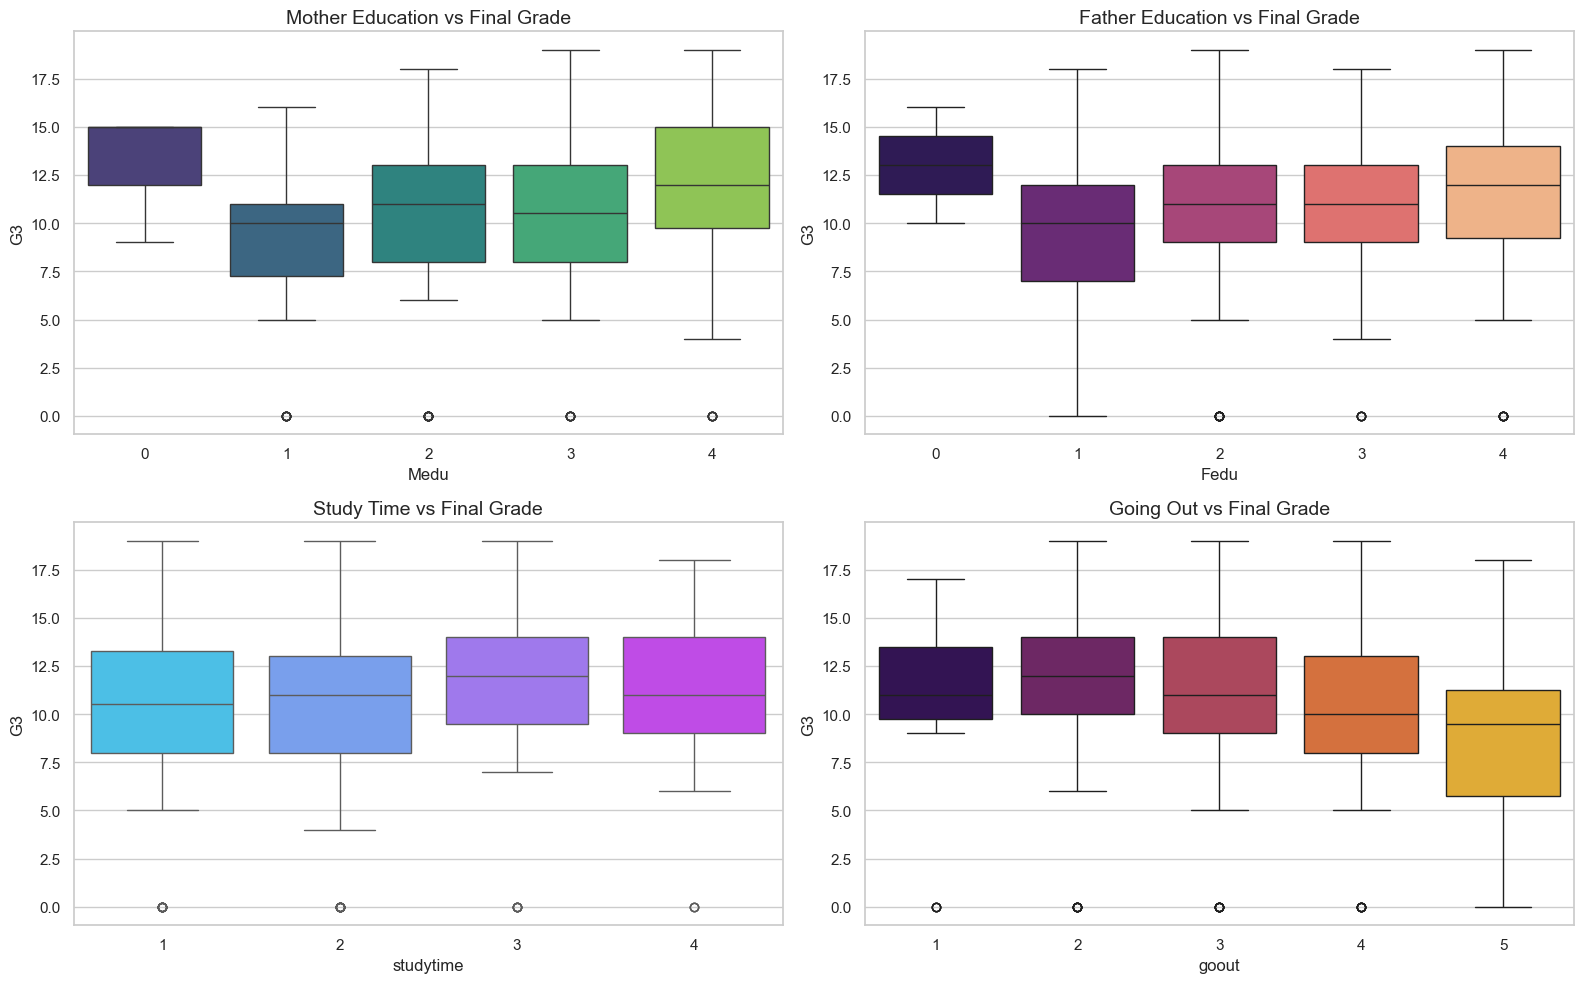

<Figure size 1400x700 with 0 Axes>

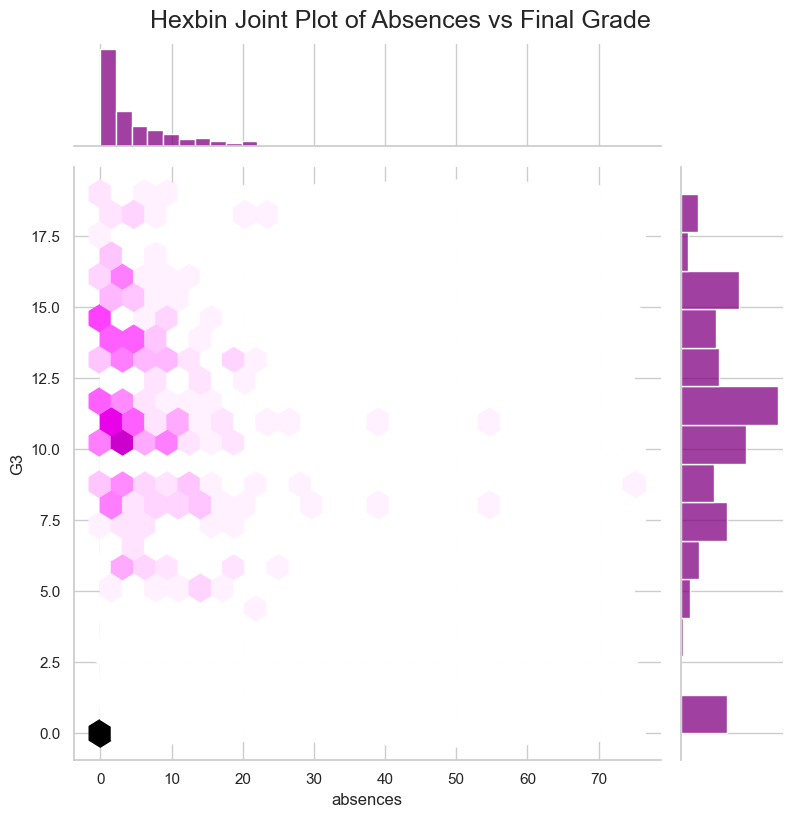

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")


train_data_copy = train_data.copy()


label_encoder = LabelEncoder()


for column in train_data_copy.select_dtypes(include=['object']).columns:
    train_data_copy[column] = label_encoder.fit_transform(train_data_copy[column])


X = train_data_copy.drop('G3', axis=1)
y = train_data_copy['G3']


processed_df = X.copy()
processed_df['G3'] = y.values


plt.figure(figsize=(16, 12))
corr = processed_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.triu(corr))
plt.title('Correlation Matrix of Features', fontsize=18)
plt.show()

# Listing High and Low Correlations
high_corr = corr.unstack().sort_values(kind="quicksort", ascending=False)
high_corr = high_corr[high_corr != 1]  # Removing self correlations
print("Top Positive Correlations:\n", high_corr[high_corr > 0.5].drop_duplicates().head(10))
print("\nTop Negative Correlations:\n", high_corr[high_corr < -0.5].drop_duplicates().head(10))



sns.set(style="whitegrid", context="notebook")
g = sns.PairGrid(processed_df[selected_features])

g.map_upper(sns.kdeplot, cmap="coolwarm", fill=True, thresh=0.1)

g.map_lower(sns.scatterplot, alpha=0.6, s=40, edgecolor='w')

g.map_diag(sns.histplot, kde=True, color='skyblue')

g.fig.suptitle("PairGrid of Selected Features", fontsize=16, y=1.02)
g.fig.tight_layout()
plt.show()



# 8. رسم نمودار برای تحلیل‌های جدید (نمودارهای چندگانه دیگر)
plt.figure(figsize=(14, 7))
sns.kdeplot(data=processed_df, x="G1", y="G3", fill=True, cmap="mako", thresh=0.05)
plt.title('KDE Plot of First Period Grade (G1) vs Final Grade (G3)', fontsize=18)
plt.xlabel('First Period Grade (G1)', fontsize=14)
plt.ylabel('Final Grade (G3)', fontsize=14)
plt.show()


# 3. تحلیل ویژگی‌های چندگانه با هدف (Multivariate Analysis) با نمایش مقادیر اصلی
plt.figure(figsize=(18, 10))
sns.violinplot(x=train_data['famsize'], y='G3', data=processed_df, inner="quartile", palette="muted")
sns.swarmplot(x=train_data['famsize'], y='G3', data=processed_df, color='k', alpha=0.7)
plt.title('Violin and Swarm Plot of Family Size and Final Grade', fontsize=18)
plt.show()


# 4. تحلیل توزیعی (Distribution Analysis) برای ویژگی‌های باینری دیگر
binary_features = ['school', 'sex', 'Pstatus', 'schoolsup', 'famsup', 'romantic']
for feature in binary_features:
    plt.figure(figsize=(14, 7))
    sns.histplot(data=train_data, x="G3", kde=True, hue=feature, multiple="stack", palette="coolwarm")
    plt.title(f'Distribution of Final Grade with {feature.capitalize()}', fontsize=18)
    plt.xlabel('Final Grade (G3)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()



# 6. Violin Plot to show the distribution of features against target
plt.figure(figsize=(14, 6))
sns.violinplot(x="G3", y="age", data=processed_df, palette="muted")  # جای G3 و age با ستون‌های مورد نظر شما جایگزین شود
plt.title('Violin Plot of Feature Distribution by Target')
plt.show()

# 7. Boxplot to observe the spread and outliers
plt.figure(figsize=(14, 6))
sns.boxplot(x="G3", y="age", data=processed_df)  # جای G3 و age با ستون‌های مورد نظر شما جایگزین شود
plt.title('Boxplot of Feature Distribution by Target')
plt.show()


# 7. مقایسه فیچرها با استفاده از GridSpec برای نمایش همزمان نمودارها
import matplotlib.gridspec as gridspec

plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)

# نمودار 1: رابطه Medu با G3
ax1 = plt.subplot(gs[0, 0])
sns.boxplot(x='Medu', y='G3', data=processed_df, palette="viridis", ax=ax1)
ax1.set_title('Mother Education vs Final Grade', fontsize=14)

# نمودار 2: رابطه Fedu با G3
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(x='Fedu', y='G3', data=processed_df, palette="magma", ax=ax2)
ax2.set_title('Father Education vs Final Grade', fontsize=14)

# نمودار 3: رابطه Studytime با G3
ax3 = plt.subplot(gs[1, 0])
sns.boxplot(x='studytime', y='G3', data=processed_df, palette="cool", ax=ax3)
ax3.set_title('Study Time vs Final Grade', fontsize=14)

# نمودار 4: رابطه goout با G3
ax4 = plt.subplot(gs[1, 1])
sns.boxplot(x='goout', y='G3', data=processed_df, palette="inferno", ax=ax4)
ax4.set_title('Going Out vs Final Grade', fontsize=14)

plt.tight_layout()
plt.show()



plt.figure(figsize=(14, 7))
sns.jointplot(data=processed_df, x="absences", y="G3", kind="hex", color="purple", height=8)
plt.suptitle('Hexbin Joint Plot of Absences vs Final Grade', y=1.02, fontsize=18)
plt.show()



In [1]:
import pandas as pd


train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")

students_with_zero_absences_and_g3 = train_data[(train_data['absences'] == 0) & (train_data['G3'] == 0)]

num_students = len(students_with_zero_absences_and_g3)
print(f'student grad & absence==0: {num_students}')


student grad & absence==0: 35


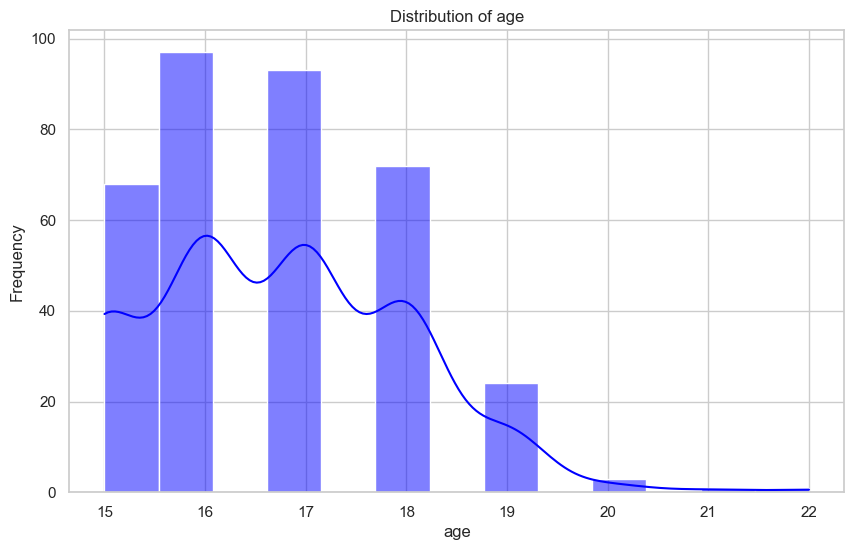

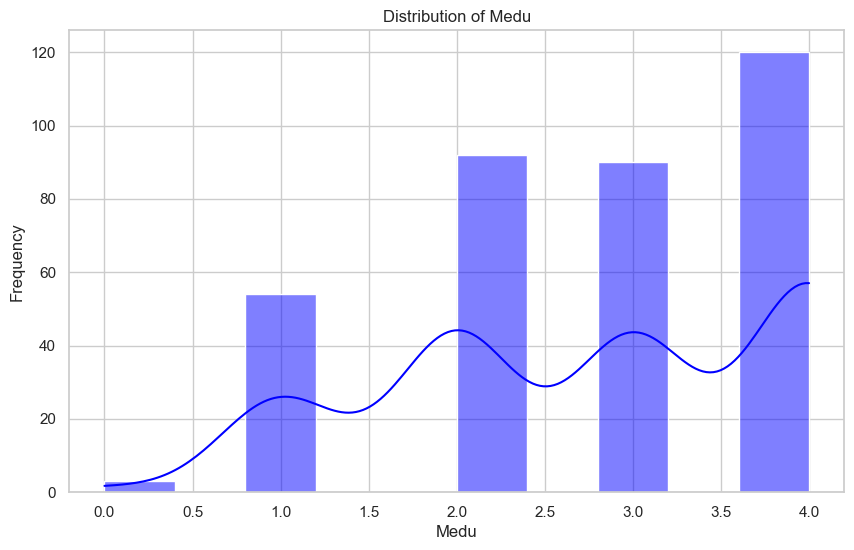

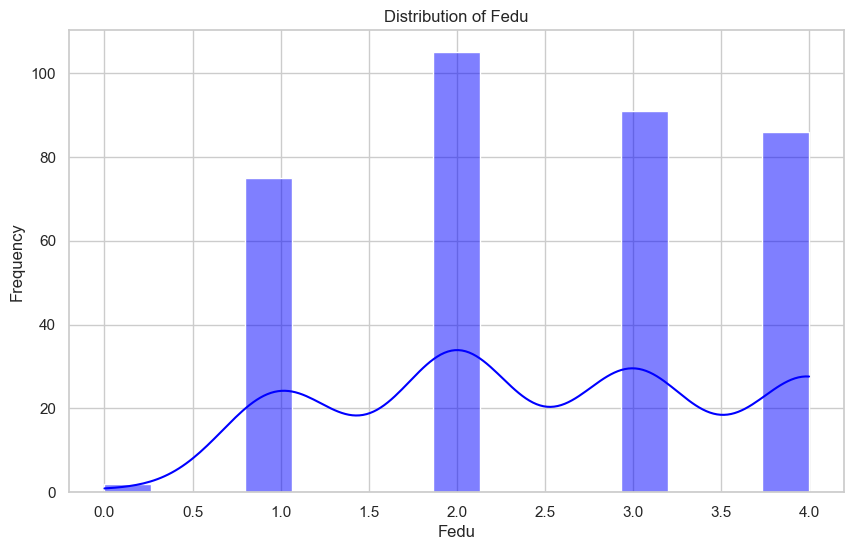

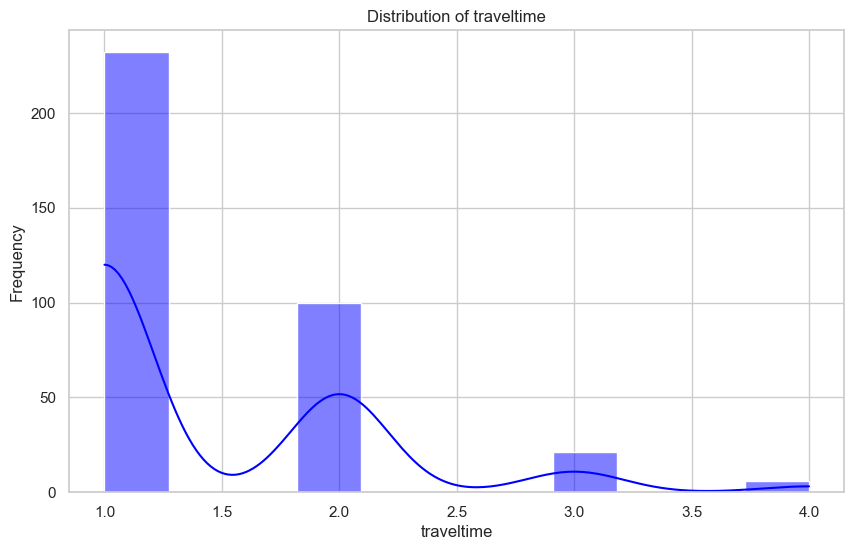

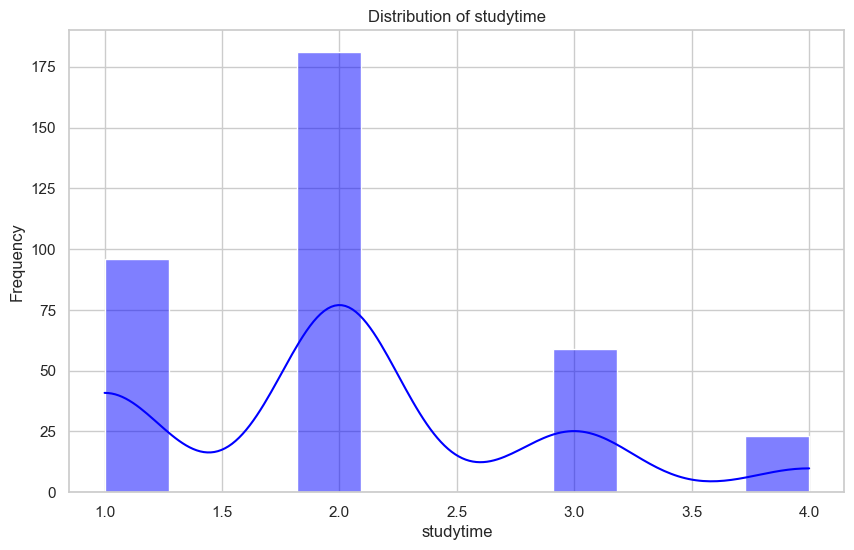

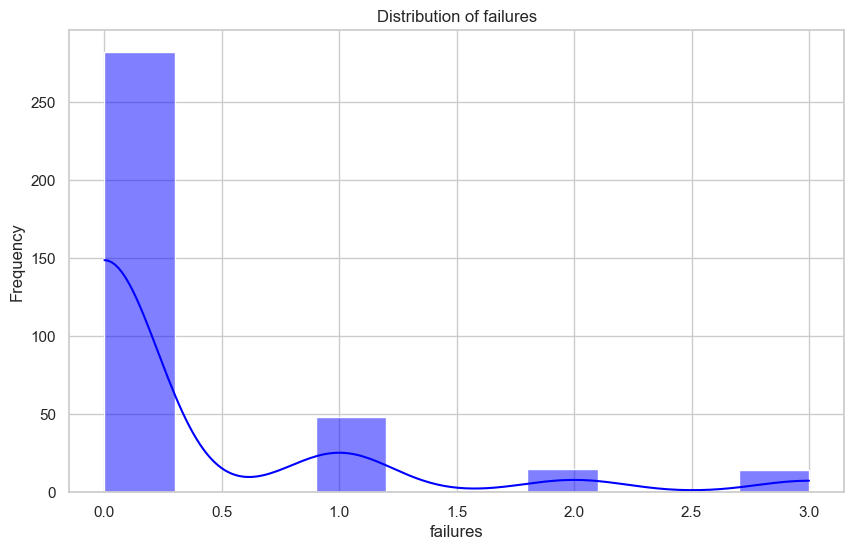

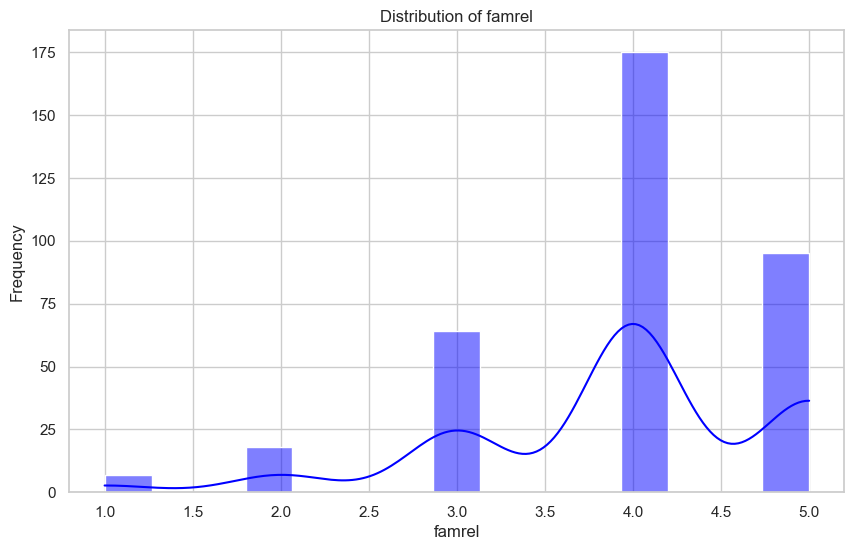

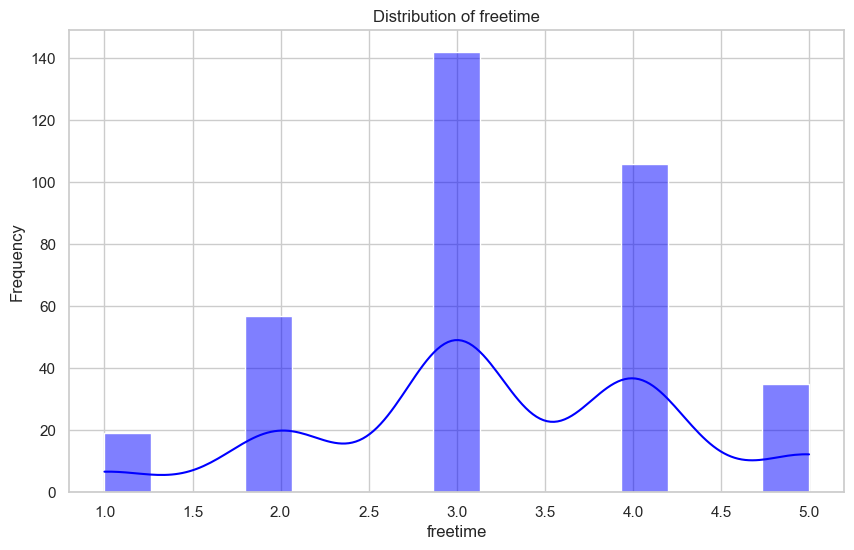

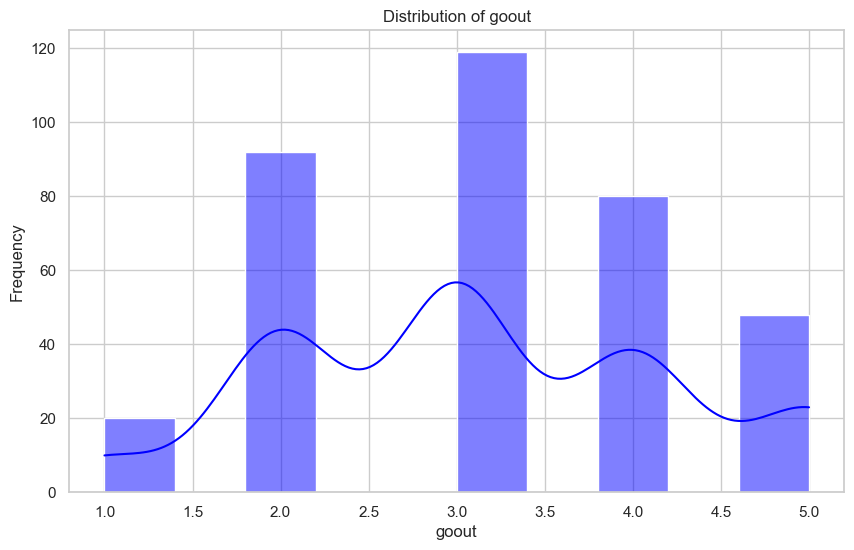

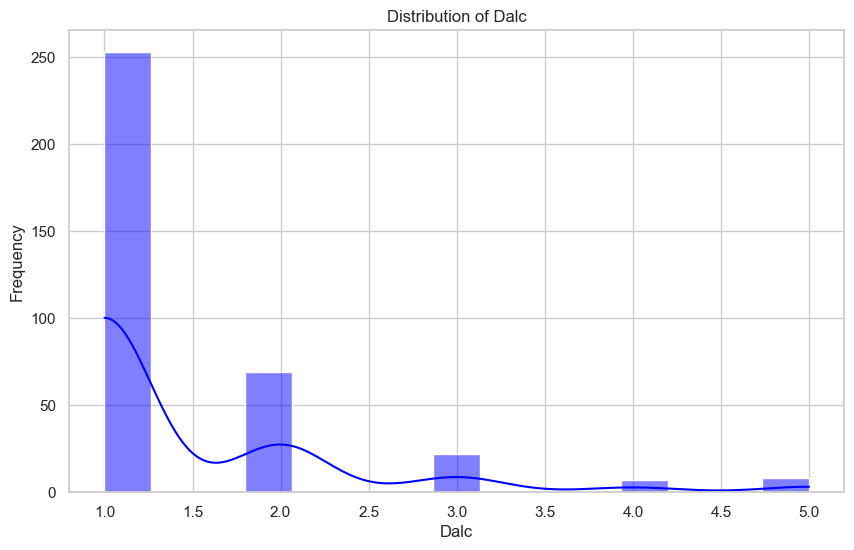

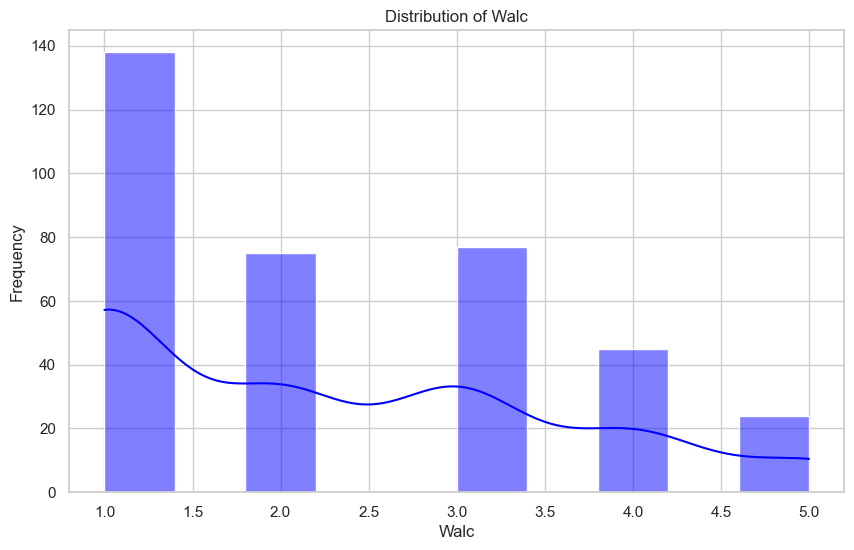

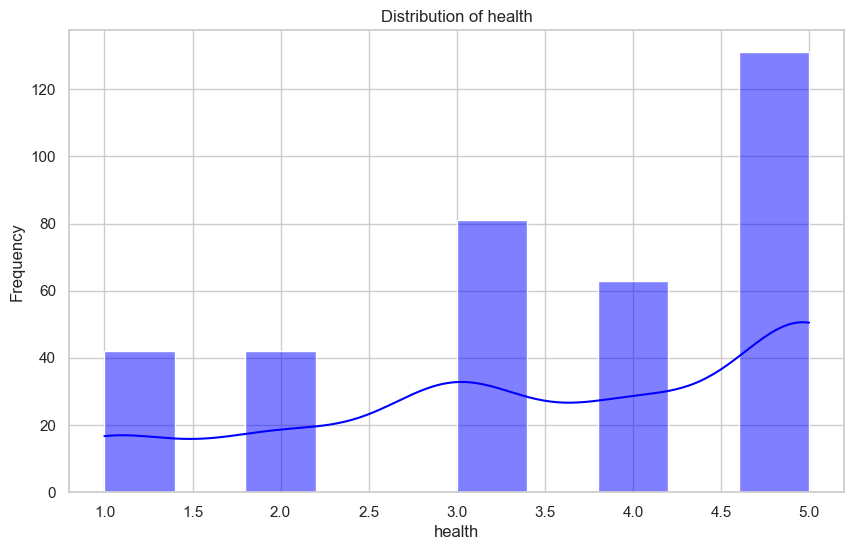

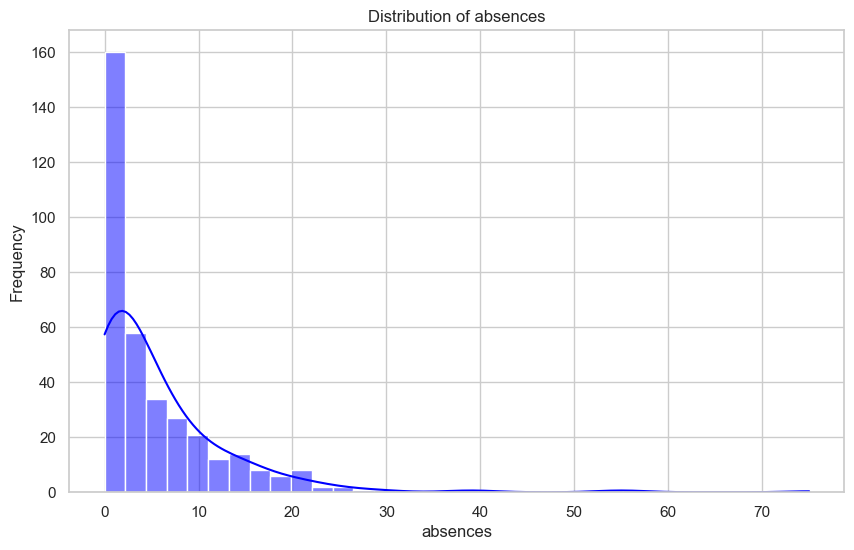

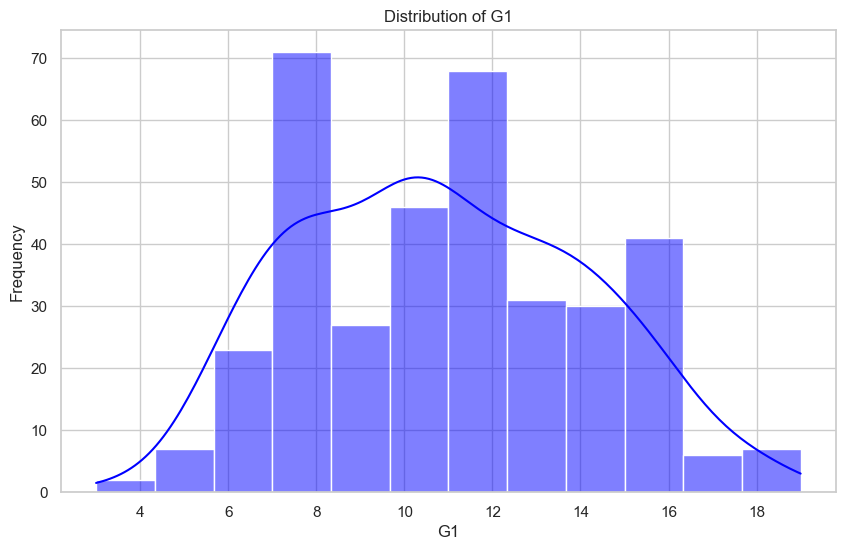

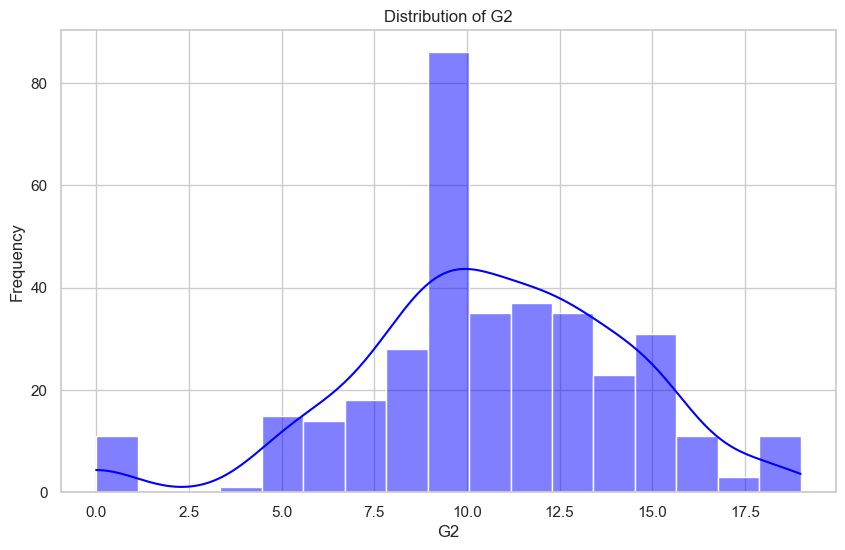

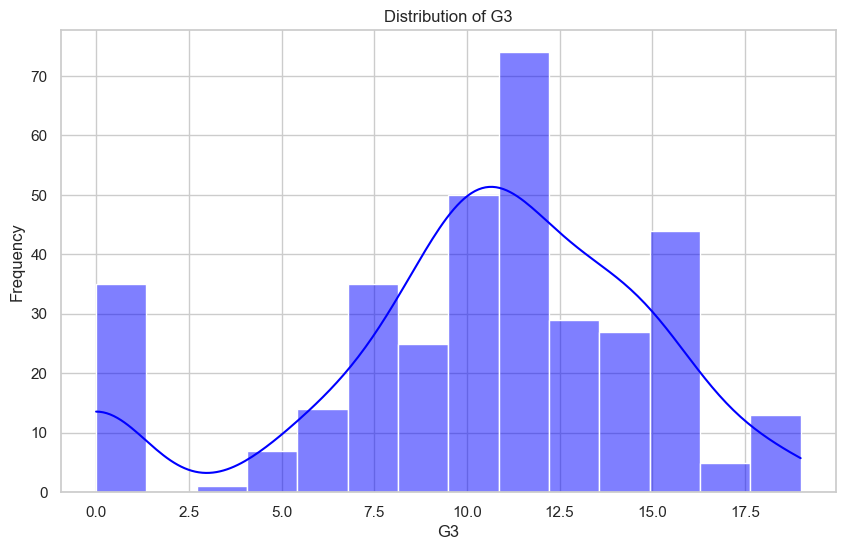

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


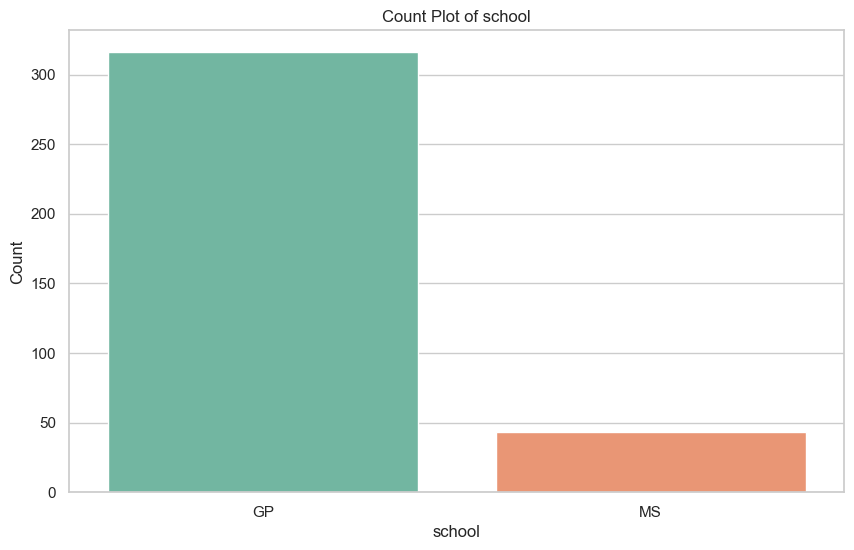

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


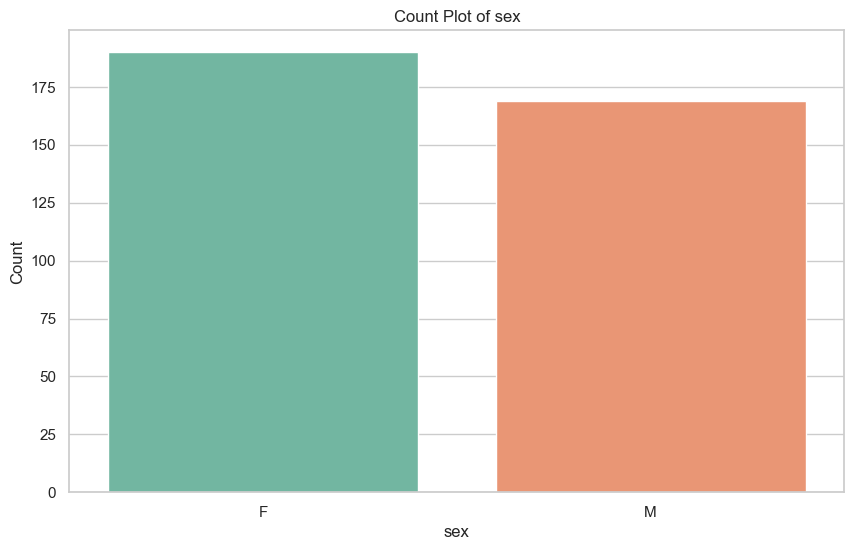

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


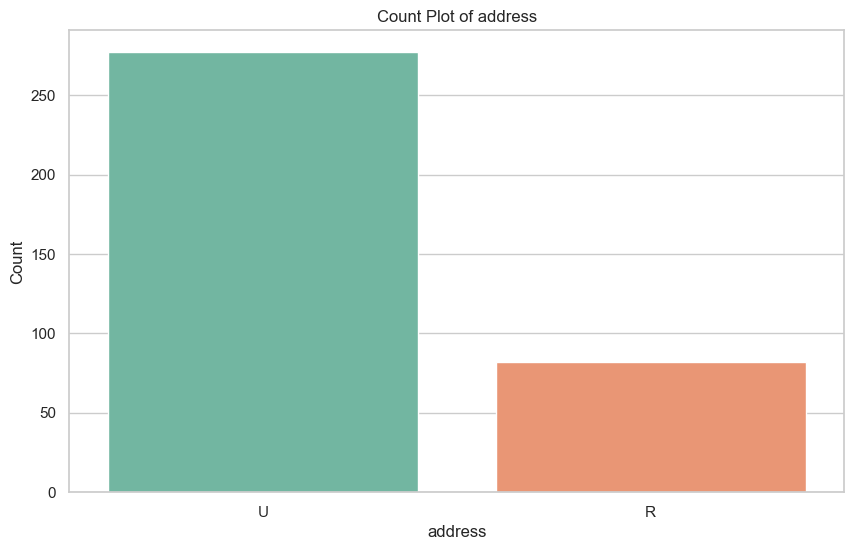

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


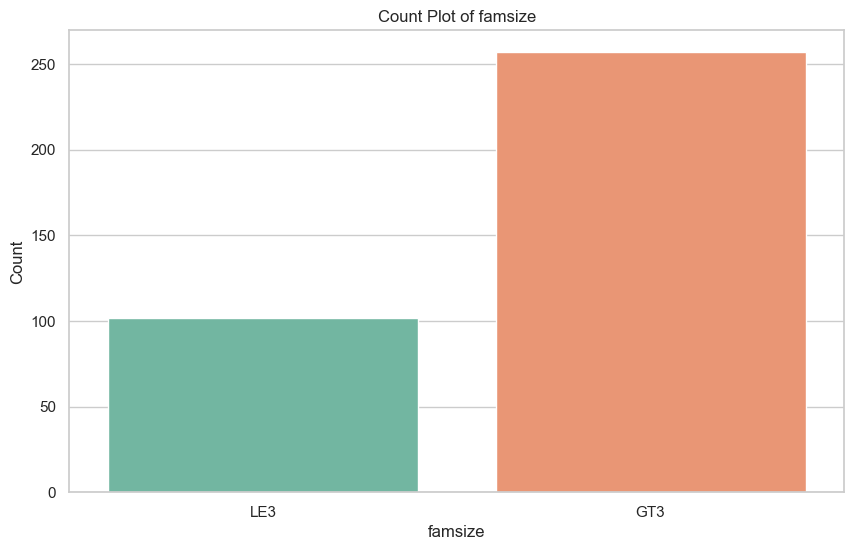

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


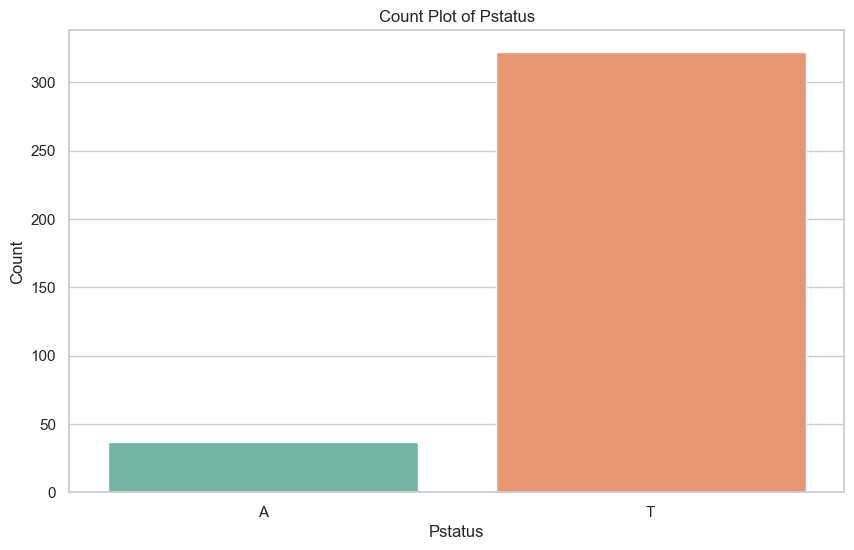

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


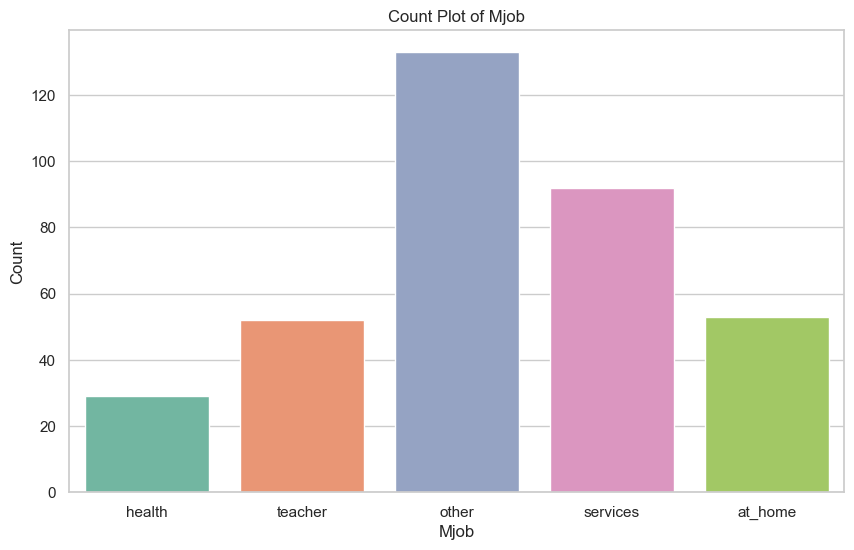

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


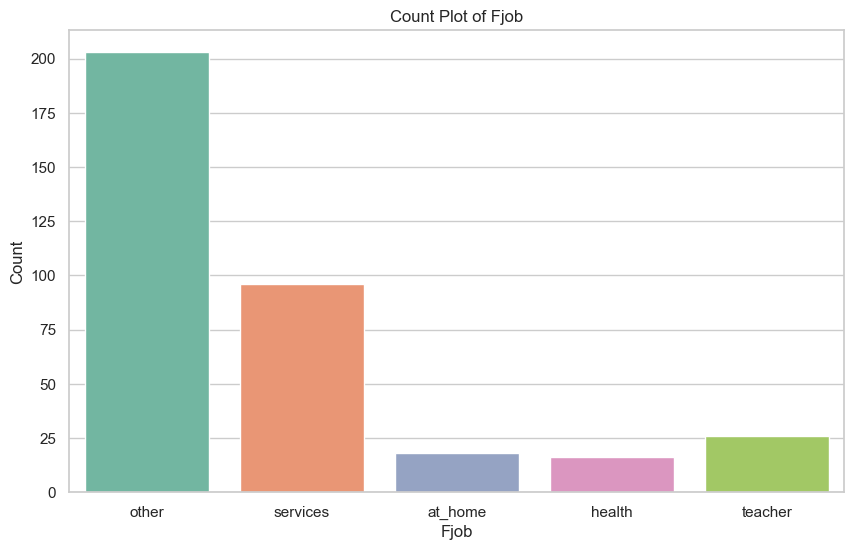

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


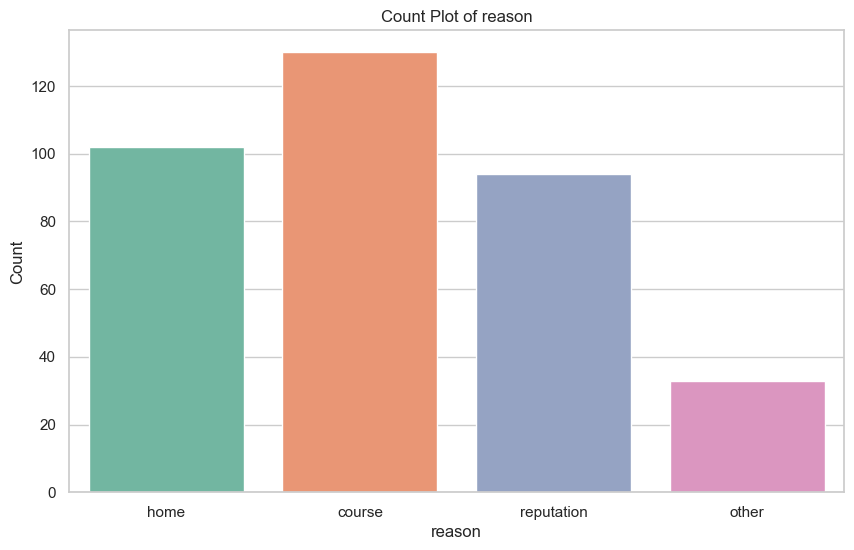

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


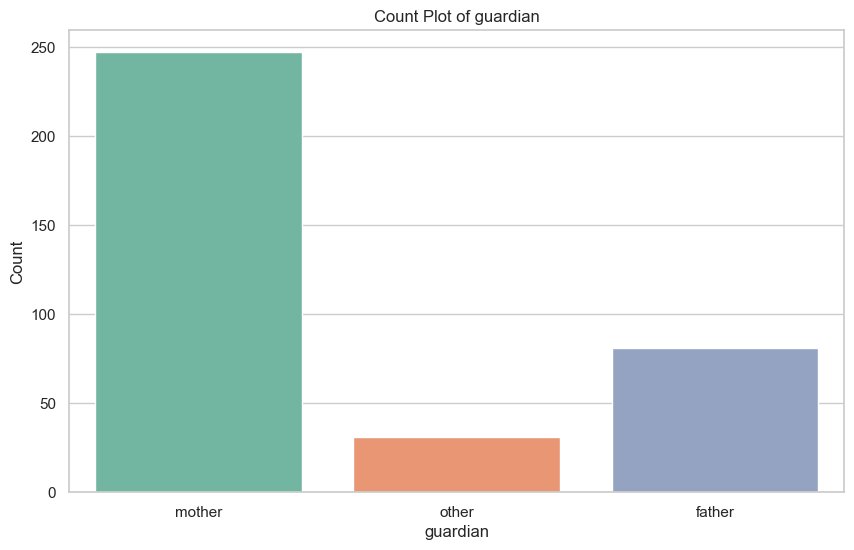

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


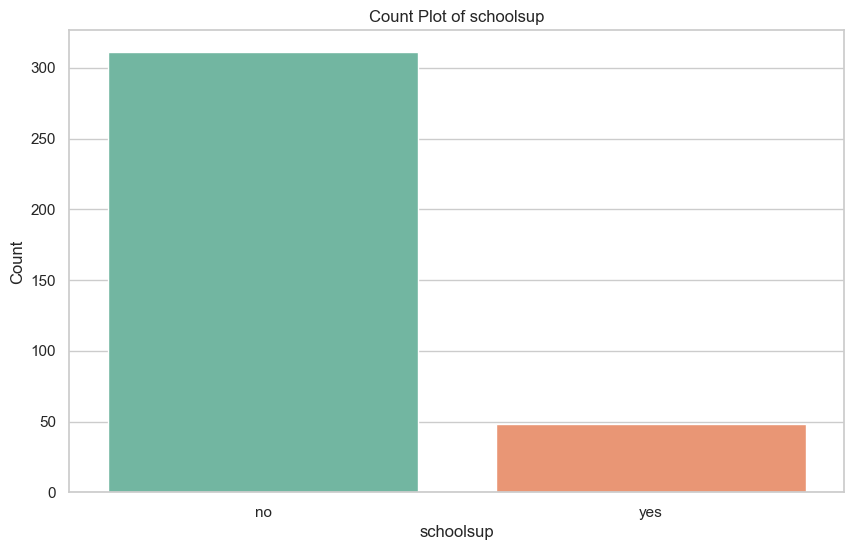

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


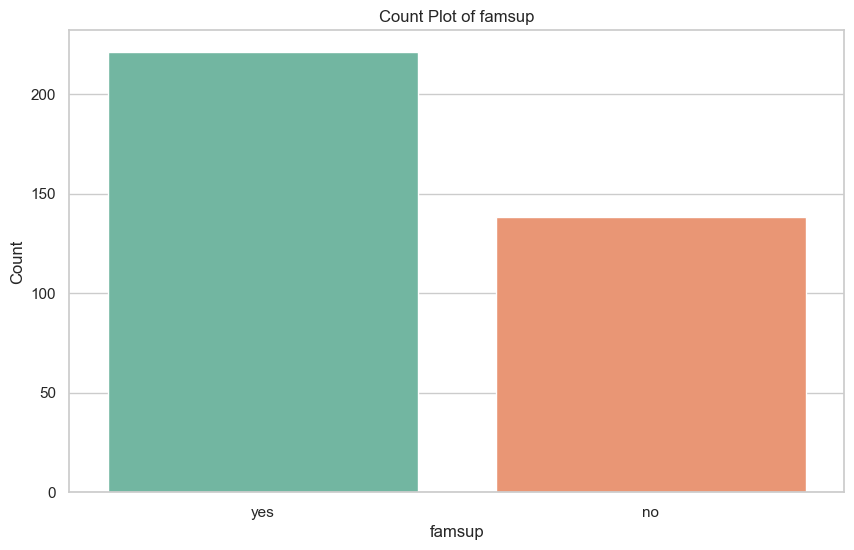

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


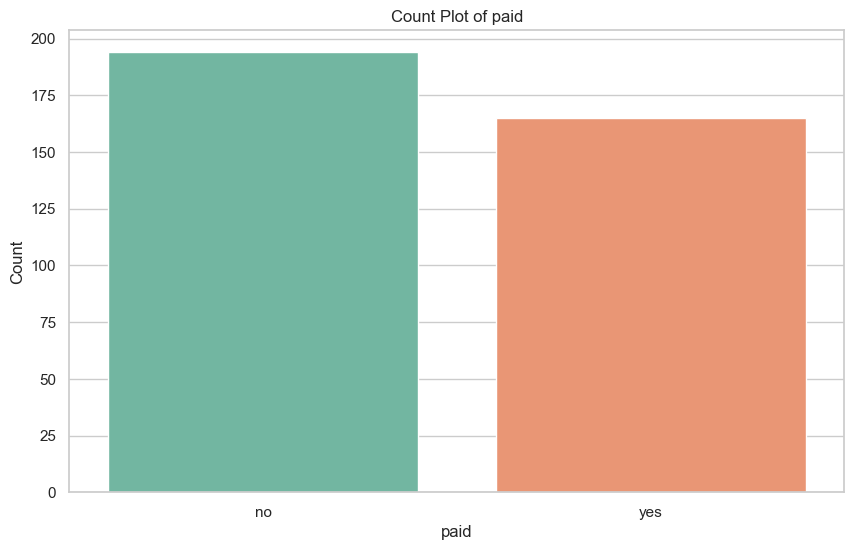

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


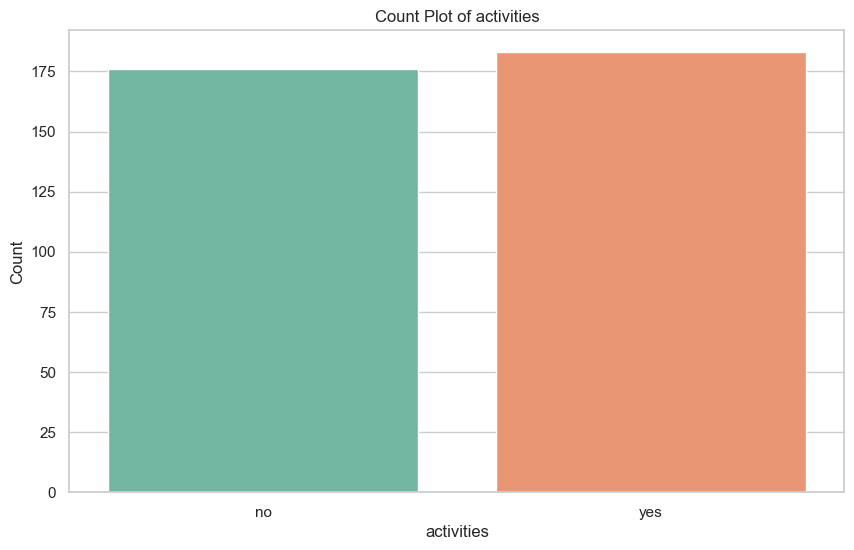

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


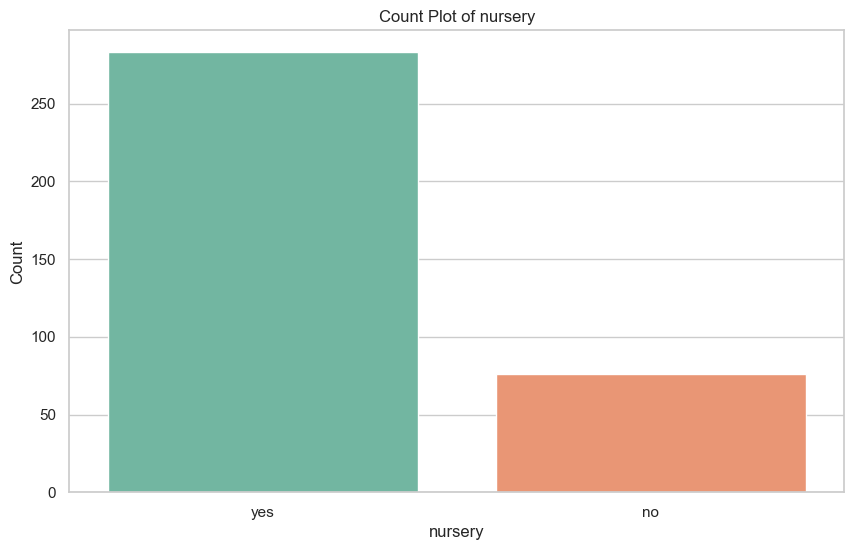

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


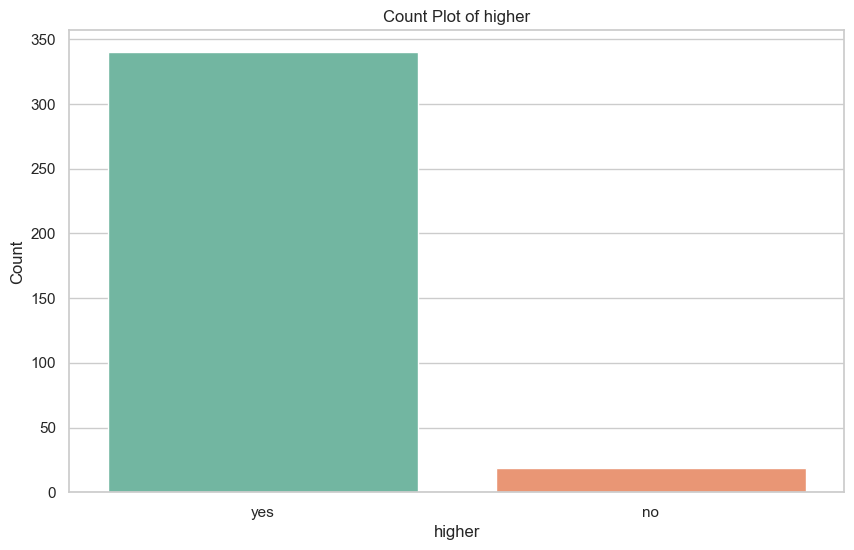

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


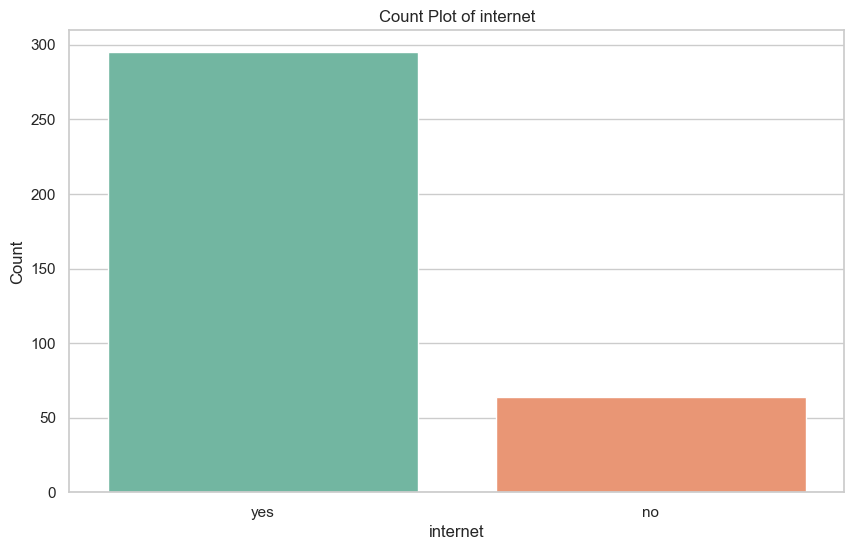

C:\Users\USER\AppData\Local\Temp\ipykernel_9192\3957289478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


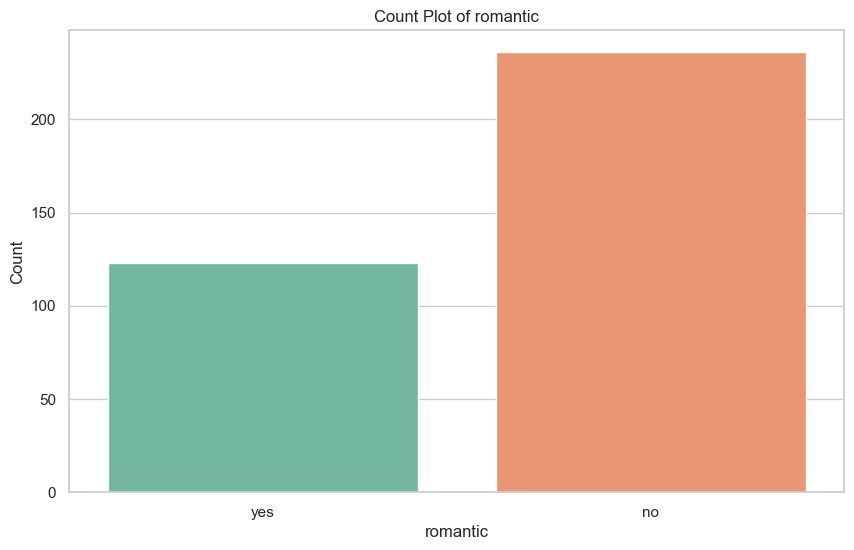

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"D:\Desktop\python\train(3).csv"
data = pd.read_csv(file_path)


numeric_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=data, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



## Data Preprocessing in an Organized Manner
```

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder, CatBoostEncoder, LeaveOneOutEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")


one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

def remove_outliers_iqr(data, columns):
    Q1 = data[columns].quantile(0.25)
    Q3 = data[columns].quantile(0.75)
    IQR = Q3 - Q1

    is_outlier = (data[columns] < (Q1 - 1.5 * IQR)) | (data[columns] > (Q3 + 1.5 * IQR))

    data_clean = data[~is_outlier.any(axis=1)]
    return data_clean

numeric_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'G1', 'G2']


train_data_clean = remove_outliers_iqr(train_data, numeric_cols)


X = train_data_clean.drop('G3', axis=1)
y = train_data_clean['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


def build_and_evaluate_model(preprocessor):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    
  
    pipeline.fit(X_train, y_train)
    

    y_pred = pipeline.predict(X_val)
    

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

#: Target Encoding + Ordinal Encoding + One-Hot Encoding
preprocessor_1 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_1 = build_and_evaluate_model(preprocessor_1)
print(f"RMSE after Target Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_1}")

# CatBoost Encoding + Ordinal Encoding + One-Hot Encoding
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_2 = build_and_evaluate_model(preprocessor_2)
print(f"RMSE after CatBoost Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_2}")

#  Target Encoding + Ordinal Encoding + Binary Encoding
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('binary', BinaryEncoder(), one_hot_cols),
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_3 = build_and_evaluate_model(preprocessor_3)
print(f"RMSE after Target Encoding + Ordinal Encoding + Binary Encoding: {rmse_3}")

# Target Encoding + Ordinal Encoding + Label Encoding
preprocessor_4 = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(), one_hot_cols),  # Label Encoding is a special case of Ordinal Encoding
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_4 = build_and_evaluate_model(preprocessor_4)
print(f"RMSE after Target Encoding + Ordinal Encoding + Label Encoding: {rmse_4}")

# Leave-One-Out Encoding + Ordinal Encoding + One-Hot Encoding
preprocessor_5 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('loo', LeaveOneOutEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_5 = build_and_evaluate_model(preprocessor_5)
print(f"RMSE after Leave-One-Out Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_5}")

#  CatBoost Encodin
preprocessor_6 = ColumnTransformer(
    transformers=[
        ('catboost', CatBoostEncoder(), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_6 = build_and_evaluate_model(preprocessor_6)
print(f"RMSE after CatBoost Encoding for all columns: {rmse_6}")

#  Leave-One-Out Encoding 
preprocessor_7 = ColumnTransformer(
    transformers=[
        ('loo', LeaveOneOutEncoder(), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_7 = build_and_evaluate_model(preprocessor_7)
print(f"RMSE after Leave-One-Out Encoding for all columns: {rmse_7}")

#   One-Hot Encoding 
preprocessor_8 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_8 = build_and_evaluate_model(preprocessor_8)
print(f"RMSE after One-Hot Encoding for all columns: {rmse_8}")


RMSE after Target Encoding + Ordinal Encoding + One-Hot Encoding: 1.5380367926949337
RMSE after CatBoost Encoding + Ordinal Encoding + One-Hot Encoding: 1.5676568375003788
RMSE after Target Encoding + Ordinal Encoding + Binary Encoding: 1.5380367926949365
RMSE after Target Encoding + Ordinal Encoding + Label Encoding: 1.5380367926949337
RMSE after Leave-One-Out Encoding + Ordinal Encoding + One-Hot Encoding: 1.5689002668088199
RMSE after CatBoost Encoding for all columns: 1.5909210272722831
RMSE after Leave-One-Out Encoding for all columns: 1.5205958519298033
RMSE after One-Hot Encoding for all columns: 1.7034156428501765


## Data Preprocessing in a Disorganized Manner


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder, CatBoostEncoder, LeaveOneOutEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


def build_and_evaluate_model(preprocessor):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    
    # آموزش مدل
    pipeline.fit(X_train, y_train)
    
    # پیش‌بینی روی داده‌های تست
    y_pred = pipeline.predict(X_val)
    
    # محاسبه RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


preprocessor_1 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_1 = build_and_evaluate_model(preprocessor_1)
print(f"RMSE after Target Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_1}")


preprocessor_2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_2 = build_and_evaluate_model(preprocessor_2)
print(f"RMSE after CatBoost Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_2}")

preprocessor_3 = ColumnTransformer(
    transformers=[
        ('binary', BinaryEncoder(), one_hot_cols),
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_3 = build_and_evaluate_model(preprocessor_3)
print(f"RMSE after Target Encoding + Ordinal Encoding + Binary Encoding: {rmse_3}")


preprocessor_4 = ColumnTransformer(
    transformers=[
        ('label', OrdinalEncoder(), one_hot_cols),  # Label Encoding is a special case of Ordinal Encoding
        ('target', TargetEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_4 = build_and_evaluate_model(preprocessor_4)
print(f"RMSE after Target Encoding + Ordinal Encoding + Label Encoding: {rmse_4}")


preprocessor_5 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('loo', LeaveOneOutEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_5 = build_and_evaluate_model(preprocessor_5)
print(f"RMSE after Leave-One-Out Encoding + Ordinal Encoding + One-Hot Encoding: {rmse_5}")


preprocessor_6 = ColumnTransformer(
    transformers=[
        ('catboost', CatBoostEncoder(), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_6 = build_and_evaluate_model(preprocessor_6)
print(f"RMSE after CatBoost Encoding for all columns: {rmse_6}")


preprocessor_7 = ColumnTransformer(
    transformers=[
        ('loo', LeaveOneOutEncoder(), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_7 = build_and_evaluate_model(preprocessor_7)
print(f"RMSE after Leave-One-Out Encoding for all columns: {rmse_7}")


preprocessor_8 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols + target_encode_cols + ordinal_cols)
    ],
    remainder='passthrough'
)
rmse_8 = build_and_evaluate_model(preprocessor_8)
print(f"RMSE after One-Hot Encoding for all columns: {rmse_8}")


RMSE after Target Encoding + Ordinal Encoding + One-Hot Encoding: 1.9619939105295472
RMSE after CatBoost Encoding + Ordinal Encoding + One-Hot Encoding: 1.9425820395522335
RMSE after Target Encoding + Ordinal Encoding + Binary Encoding: 1.9619418796827157
RMSE after Target Encoding + Ordinal Encoding + Label Encoding: 1.9619939105295472
RMSE after Leave-One-Out Encoding + Ordinal Encoding + One-Hot Encoding: 1.943695379014297
RMSE after CatBoost Encoding for all columns: 1.9872551142652637
RMSE after Leave-One-Out Encoding for all columns: 2.543811302662152
RMSE after One-Hot Encoding for all columns: 2.0236248850748533


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from category_encoders import CatBoostEncoder
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

# بارگذاری داده‌ها
train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2','G3', 'absences']


X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val




def iqr_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df


def zscore_iqr_outliers(df, cols_zscore, cols_iqr):
    for col in cols_zscore:
        z_scores = np.abs(stats.zscore(df[col]))
        df[col] = np.where(z_scores > 3, df[col].median(), df[col])
    df = iqr_outliers(df, cols_iqr)
    return df


def isolation_forest_outliers(df, cols):
    iso = IsolationForest(contamination=0.05, random_state=42)
    df['anomaly'] = iso.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df

def lof_outliers(df, cols):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    df['anomaly'] = lof.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


def build_and_evaluate_model(preprocessor, X_train, X_val, y_train, y_val):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    

    pipeline.fit(X_train, y_train)
    

    y_pred = pipeline.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


preprocessor_2 = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)




X_train_iqr = iqr_outliers(X_train_copy.copy(), numeric_cols)
X_val_iqr = iqr_outliers(X_val_copy.copy(), numeric_cols)

y_train_iqr = X_train_iqr.pop('G3')
y_val_iqr = X_val_iqr.pop('G3')
rmse_iqr = build_and_evaluate_model(preprocessor_2, X_train_iqr, X_val_iqr, y_train_iqr, y_val_iqr)
print(f"RMSE after IQR Outlier Management: {rmse_iqr}")


X_train_zscore_iqr = zscore_iqr_outliers(X_train_copy.copy(), ['G1', 'G2', 'G3'], ['absences'])
X_val_zscore_iqr = zscore_iqr_outliers(X_val_copy.copy(), ['G1', 'G2', 'G3'], ['absences'])
# حذف ستون هدف قبل از ارزیابی مدل
y_train_zscore_iqr = X_train_zscore_iqr.pop('G3')
y_val_zscore_iqr = X_val_zscore_iqr.pop('G3')
rmse_zscore_iqr = build_and_evaluate_model(preprocessor_2, X_train_zscore_iqr, X_val_zscore_iqr, y_train_zscore_iqr, y_val_zscore_iqr)
print(f"RMSE after Z-Score + IQR Outlier Management: {rmse_zscore_iqr}")


X_train_iso = isolation_forest_outliers(X_train_copy.copy(), numeric_cols)
X_val_iso = isolation_forest_outliers(X_val_copy.copy(), numeric_cols)

y_train_iso = X_train_iso.pop('G3')
y_val_iso = X_val_iso.pop('G3')
rmse_iso = build_and_evaluate_model(preprocessor_2, X_train_iso, X_val_iso, y_train_iso, y_val_iso)
print(f"RMSE after Isolation Forest Outlier Management: {rmse_iso}")

X_train_lof = lof_outliers(X_train_copy.copy(), numeric_cols)
X_val_lof = lof_outliers(X_val_copy.copy(), numeric_cols)

y_train_lof = X_train_lof.pop('G3')
y_val_lof = X_val_lof.pop('G3')
rmse_lof = build_and_evaluate_model(preprocessor_2, X_train_lof, X_val_lof, y_train_lof, y_val_lof)
print(f"RMSE after LOF Outlier Management: {rmse_lof}")


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)
y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')
rmse_ee = build_and_evaluate_model(preprocessor_2, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Elliptic Envelope Outlier Management: {rmse_ee}")


RMSE after IQR Outlier Management: 1.5349581129139547
RMSE after Z-Score + IQR Outlier Management: 1.904787134271719
RMSE after Isolation Forest Outlier Management: 1.8887450276846134
RMSE after LOF Outlier Management: 1.926969058542631
RMSE after Elliptic Envelope Outlier Management: 1.270010217030492


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from category_encoders import CatBoostEncoder
from sklearn.covariance import EllipticEnvelope


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2', 'G3', 'absences']


X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_copy = X_train.copy()
X_val_copy = X_val.copy()


X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val

def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)


y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')


one_hot_cols = [col for col in one_hot_cols if col in X_train_ee.columns]
target_encode_cols = [col for col in target_encode_cols if col in X_train_ee.columns]
ordinal_cols = [col for col in ordinal_cols if col in X_train_ee.columns]
numeric_cols = [col for col in numeric_cols if col in X_train_ee.columns]


def build_and_evaluate_model(preprocessor, X_train, X_val, y_train, y_val):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    

    pipeline.fit(X_train, y_train)
    

    y_pred = pipeline.predict(X_val)
    

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse

base_preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols)
    ],
    remainder='passthrough'
)



def log_transform_no_negatives(X):
    return np.log1p(X) 


def sqrt_transform_no_negatives(X):
    return np.sqrt(X + 1e-5) 


def reciprocal_transform_no_negatives(X):
    return 1 / (X + 1)  


yeojohnson_transformer = PowerTransformer(method='yeo-johnson')




preprocessor_log = Pipeline(steps=[
    ('base_preprocessor', base_preprocessor),
    ('log_transformer', FunctionTransformer(log_transform_no_negatives))
])
rmse_log = build_and_evaluate_model(preprocessor_log, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Log Transformation: {rmse_log}")


preprocessor_sqrt = Pipeline(steps=[
    ('base_preprocessor', base_preprocessor),
    ('sqrt_transformer', FunctionTransformer(sqrt_transform_no_negatives))
])
rmse_sqrt = build_and_evaluate_model(preprocessor_sqrt, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Square Root Transformation: {rmse_sqrt}")


preprocessor_reciprocal = Pipeline(steps=[
    ('base_preprocessor', base_preprocessor),
    ('reciprocal_transformer', FunctionTransformer(reciprocal_transform_no_negatives))
])
rmse_reciprocal = build_and_evaluate_model(preprocessor_reciprocal, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Reciprocal Transformation: {rmse_reciprocal}")


preprocessor_yeojohnson = Pipeline(steps=[
    ('base_preprocessor', base_preprocessor),
    ('yeojohnson_transformer', yeojohnson_transformer)
])
rmse_yeojohnson = build_and_evaluate_model(preprocessor_yeojohnson, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Yeo-Johnson Transformation: {rmse_yeojohnson}")


RMSE after Log Transformation: 1.7849502902051115
RMSE after Square Root Transformation: 1.6136003209162553
RMSE after Reciprocal Transformation: 2.389526888176454
RMSE after Yeo-Johnson Transformation: 1.2878051962678014


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from category_encoders import CatBoostEncoder
from sklearn.covariance import EllipticEnvelope


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2','G3', 'absences']


train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']


ordinal_cols = [col for col in ordinal_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc']]
numeric_cols = [col for col in numeric_cols if col not in ['G1', 'G2']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']

X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_copy = X_train.copy()
X_val_copy = X_val.copy()


X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val


def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)

y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')


one_hot_cols = [col for col in one_hot_cols if col in X_train_ee.columns]
target_encode_cols = [col for col in target_encode_cols if col in X_train_ee.columns]
ordinal_cols = [col for col in ordinal_cols if col in X_train_ee.columns]
numeric_cols = [col for col in numeric_cols if col in X_train_ee.columns]


def build_and_evaluate_model(preprocessor, X_train, X_val, y_train, y_val):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ])
    

    pipeline.fit(X_train, y_train)
    

    y_pred = pipeline.predict(X_val)
    

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


preprocessor_robust = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols),
        ('scaler', RobustScaler(), numeric_cols)
    ],
    remainder='passthrough'
)


rmse_robust = build_and_evaluate_model(preprocessor_robust, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Robust Scaling without PCA: {rmse_robust}")


RMSE after Robust Scaling without PCA: 1.0875557598508705


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from category_encoders import CatBoostEncoder
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
one_hot_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
target_encode_cols = ['Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2','G3', 'absences']


train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']


ordinal_cols = [col for col in ordinal_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc']]
numeric_cols = [col for col in numeric_cols if col not in ['G1', 'G2']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']


X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val

def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)


y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')


one_hot_cols = [col for col in one_hot_cols if col in X_train_ee.columns]
target_encode_cols = [col for col in target_encode_cols if col in X_train_ee.columns]
ordinal_cols = [col for col in ordinal_cols if col in X_train_ee.columns]
numeric_cols = [col for col in numeric_cols if col in X_train_ee.columns]

def build_and_evaluate_model(preprocessor, X_train, X_val, y_train, y_val):
    pca = PCA(n_components=0.95)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('model', LinearRegression())
    ])
    
 
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_val)
    
  
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


preprocessor_robust = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), one_hot_cols),
        ('catboost', CatBoostEncoder(), target_encode_cols),
        ('ordinal', OrdinalEncoder(), ordinal_cols),
        ('scaler', RobustScaler(), numeric_cols)
    ],
    remainder='passthrough'
)


rmse_robust_pca = build_and_evaluate_model(preprocessor_robust, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Robust Scaling and PCA: {rmse_robust_pca}")


RMSE after Robust Scaling and PCA: 1.0768880235197367


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA


train_data = pd.read_csv("D:/Desktop/python/train(3).csv")

# تعریف ستون‌ها
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
                    'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2', 'G3', 'absences']


train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

ordinal_cols = [col for col in ordinal_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc']]
numeric_cols = [col for col in numeric_cols if col not in ['G1', 'G2']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']

X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val

def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)

y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')


categorical_cols = [col for col in categorical_cols if col in X_train_ee.columns]
ordinal_cols = [col for col in ordinal_cols if col in X_train_ee.columns]
numeric_cols = [col for col in numeric_cols if col in X_train_ee.columns]


def build_and_evaluate_model(preprocessor, X_train, X_val, y_train, y_val):
    pca = PCA(n_components=0.95)
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('model', LinearRegression())
    ])
    
 
    pipeline.fit(X_train, y_train)
    

    y_pred = pipeline.predict(X_val)
    
 
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    return rmse


preprocessor_robust = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), categorical_cols + ordinal_cols),  # استفاده از OrdinalEncoder برای همه ستون‌ها
        ('scaler', RobustScaler(), numeric_cols)
    ],
    remainder='passthrough'
)


rmse_robust_pca = build_and_evaluate_model(preprocessor_robust, X_train_ee, X_val_ee, y_train_ee, y_val_ee)
print(f"RMSE after Robust Scaling and PCA with Label Encoding: {rmse_robust_pca}")


RMSE after Robust Scaling and PCA with Label Encoding: 1.0732279270607479


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import StackingRegressor


train_data = pd.read_csv("D:/Desktop/all data/train(3).csv")


categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
                    'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2', 'absences']
-
train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

ordinal_cols = [col for col in ordinal_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']

X = train_data.drop('G3', axis=1)  
y = train_data['G3']  # ستون هدف


encoder = OrdinalEncoder()
X[categorical_cols + ordinal_cols] = encoder.fit_transform(X[categorical_cols + ordinal_cols])


scaler = RobustScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'RandomForest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'CatBoost': CatBoostRegressor(silent=True),
    'GradientBoosting': GradientBoostingRegressor()
}


def kfold_cross_validation_evaluation(models, X, y):
    results = {}
    
   
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for model_name, model in models.items():
   
        pipeline = Pipeline(steps=[
            ('model', model)
        ])
        
        rmse_list = []
        for train_index, val_index in kf.split(X):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
            
            pipeline.fit(X_train_fold, y_train_fold)
            y_pred = pipeline.predict(X_val_fold)
            
            rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
            rmse_list.append(rmse)
        
        avg_rmse = np.mean(rmse_list)
        results[model_name] = avg_rmse
        print(f'{model_name} K-Fold Cross-Validated RMSE: {avg_rmse}')
    
    return results


kfold_cv_results = kfold_cross_validation_evaluation(models, X_train, y_train)


print(kfold_cv_results)

stacking_model = StackingRegressor(
    estimators=[
        ('RandomForest', RandomForestRegressor()),
        ('ExtraTrees', ExtraTreesRegressor()),
        ('CatBoost', CatBoostRegressor(silent=True)),
        ('GradientBoosting', GradientBoostingRegressor())
    ],
    final_estimator=GradientBoostingRegressor()  # استفاده از GradientBoosting به عنوان متا مدل
)


def evaluate_stacking_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        rmse_list.append(rmse)
    
    avg_rmse = np.mean(rmse_list)
    print(f'Stacking Model K-Fold Cross-Validated RMSE: {avg_rmse}')
    return avg_rmse

-
stacking_rmse = evaluate_stacking_model(stacking_model, X_train, y_train)

RandomForest K-Fold Cross-Validated RMSE: 1.6086077235326848
ExtraTrees K-Fold Cross-Validated RMSE: 1.880095285584834
CatBoost K-Fold Cross-Validated RMSE: 1.5951126776990443
GradientBoosting K-Fold Cross-Validated RMSE: 1.7100993896752423
{'RandomForest': 1.6086077235326848, 'ExtraTrees': 1.880095285584834, 'CatBoost': 1.5951126776990443, 'GradientBoosting': 1.7100993896752423}
Stacking Model K-Fold Cross-Validated RMSE: 1.8190601687223267


## Data Leakage👇👇⬇️⬇️

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import StackingRegressor


train_data = pd.read_csv("D:/Desktop/all data/train(3).csv")

# تعریف ستون‌ها
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 
                    'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 
                    'Mjob', 'Fjob', 'reason', 'guardian']
ordinal_cols = ['Medu', 'Fedu', 'age', 'traveltime', 'studytime', 'failures', 
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numeric_cols = ['G1', 'G2', 'G3', 'absences']


train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']


ordinal_cols = [col for col in ordinal_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc']]
numeric_cols = [col for col in numeric_cols if col not in ['G1', 'G2']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']


encoder = OrdinalEncoder()
train_data[categorical_cols + ordinal_cols] = encoder.fit_transform(train_data[categorical_cols + ordinal_cols])


scaler = StandardScaler()
train_data[numeric_cols] = scaler.fit_transform(train_data[numeric_cols])

X = train_data.drop('G3', axis=1)
y = train_data['G3']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_copy = X_train.copy()
X_val_copy = X_val.copy()

X_train_copy['G3'] = y_train
X_val_copy['G3'] = y_val


from sklearn.covariance import EllipticEnvelope
def elliptic_envelope_outliers(df, cols):
    ee = EllipticEnvelope(contamination=0.05, random_state=42)
    df['anomaly'] = ee.fit_predict(df[cols])
    df = df[df['anomaly'] == 1].drop('anomaly', axis=1)
    return df


X_train_ee = elliptic_envelope_outliers(X_train_copy.copy(), numeric_cols)
X_val_ee = elliptic_envelope_outliers(X_val_copy.copy(), numeric_cols)

y_train_ee = X_train_ee.pop('G3')
y_val_ee = X_val_ee.pop('G3')


models = {
    'RandomForest': RandomForestRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'CatBoost': CatBoostRegressor(silent=True),
    'GradientBoosting': GradientBoostingRegressor()
}


def kfold_cross_validation_evaluation(models, X, y):
    results = {}
    
    # KFold با 5 بخش
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for model_name, model in models.items():
        # پایپ‌لاین برای هر مدل
        pipeline = Pipeline(steps=[
            ('model', model)
        ])
        
        rmse_list = []
        for train_index, val_index in kf.split(X):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
            
            pipeline.fit(X_train_fold, y_train_fold)
            y_pred = pipeline.predict(X_val_fold)
            
            rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
            rmse_list.append(rmse)
        
        avg_rmse = np.mean(rmse_list)
        results[model_name] = avg_rmse
        print(f'{model_name} K-Fold Cross-Validated RMSE: {avg_rmse}')
    
    return results

kfold_cv_results = kfold_cross_validation_evaluation(models, X_train_ee, y_train_ee)

print(kfold_cv_results)


stacking_model = StackingRegressor(
    estimators=[
        ('RandomForest', RandomForestRegressor()),
        ('ExtraTrees', ExtraTreesRegressor()),
        ('CatBoost', CatBoostRegressor(silent=True)),
        ('GradientBoosting', GradientBoostingRegressor())
    ],
    final_estimator=GradientBoostingRegressor() 
)


def evaluate_stacking_model(model, X, y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        y_pred = model.predict(X_val_fold)
        
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        rmse_list.append(rmse)
    
    avg_rmse = np.mean(rmse_list)
    print(f'Stacking Model K-Fold Cross-Validated RMSE: {avg_rmse}')
    return avg_rmse


stacking_rmse = evaluate_stacking_model(stacking_model, X_train_ee, y_train_ee)


RandomForest K-Fold Cross-Validated RMSE: 0.22145094470771848
ExtraTrees K-Fold Cross-Validated RMSE: 0.254244862087461
CatBoost K-Fold Cross-Validated RMSE: 0.24739834632359012
GradientBoosting K-Fold Cross-Validated RMSE: 0.23717175639198115
{'RandomForest': 0.22145094470771848, 'ExtraTrees': 0.254244862087461, 'CatBoost': 0.24739834632359012, 'GradientBoosting': 0.23717175639198115}
Stacking Model K-Fold Cross-Validated RMSE: 0.2653249714236674


In [4]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np


train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")


X = train_data.drop(columns=['G3']) 
y = train_data['G3'] 

categorical_cols = X.select_dtypes(include='object').columns.tolist()


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)


cat_model = CatBoostRegressor(silent=True, cat_features=categorical_cols)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

cat_scores = cross_val_score(cat_model, X, y, cv=kf, scoring=rmse_scorer)


print(f'CatBoost RMSE Scores: {-cat_scores}')
print(f'CatBoost RMSE Mean: {-np.mean(cat_scores)}')


CatBoost RMSE Scores: [1.71976028 1.04328358 1.63372953 1.60369951 1.87258103]
CatBoost RMSE Mean: 1.5746107874945772


In [11]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")


categorical_cols = train_data.select_dtypes(include='object').columns.tolist()


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

def remove_outliers(df, threshold=1.5):
    # برای هر ستون عددی، داده‌های پرت را بر اساس IQR حذف می‌کنیم
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # حذف داده‌های پرت
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


train_data_cleaned = remove_outliers(train_data)


train_data_cleaned['Fedu_Medu'] = train_data_cleaned['Fedu'] + train_data_cleaned['Medu']
train_data_cleaned['Walc_Dalc'] = train_data_cleaned['Walc'] + train_data_cleaned['Dalc']
train_data_cleaned['G1_G2'] = train_data_cleaned['G1'] + train_data_cleaned['G2']


numeric_cols = train_data_cleaned.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]
numeric_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']


X = train_data_cleaned.drop(columns=['G3'])  # ویژگی‌ها
y = train_data_cleaned['G3']  # متغیر هدف


for col in categorical_cols:
    X[col] = X[col].astype('category')

cat_model = CatBoostRegressor(silent=True, cat_features=categorical_cols)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

cat_scores = cross_val_score(cat_model, X, y, cv=kf, scoring=rmse_scorer)

print(f'CatBoost RMSE Scores: {-cat_scores}')
print(f'CatBoost RMSE Mean: {-np.mean(cat_scores)}')


CatBoost RMSE Scores: [0.99485926 0.92032431 0.78919508 0.82092531 1.05389777]
CatBoost RMSE Mean: 0.9158403462929599


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")
test_data = pd.read_csv("http://dataqueez.ir/files/questions/test(3).csv")

train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

test_data['Fedu_Medu'] = test_data['Fedu'] + test_data['Medu']
test_data['Walc_Dalc'] = test_data['Walc'] + test_data['Dalc']
test_data['G1_G2'] = test_data['G1'] + test_data['G2']

train_data['G1_G3_cluster'] = np.where((train_data['G1'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G1_G3_cluster'] = np.where(test_data['G1'] >= 10, 1, 0)  # چون تست G3 ندارد، فقط G1 را در نظر می‌گیریم

train_data['G2_G3_cluster'] = np.where((train_data['G2'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G2_G3_cluster'] = np.where(test_data['G2'] >= 10, 1, 0)  # چون تست G3 ندارد، فقط G2 را در نظر می‌گیریم


all_cols = train_data.columns.tolist()
all_cols.remove('G3')

all_cols = [col for col in all_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]

all_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2', 'G1_G3_cluster', 'G2_G3_cluster']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[all_cols] = encoder.fit_transform(train_data[all_cols])
test_data[all_cols] = encoder.transform(test_data[all_cols])

numeric_cols = ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']


pt = PowerTransformer(method='yeo-johnson', standardize=False)
train_data[numeric_cols] = pt.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = pt.transform(test_data[numeric_cols])

-
scaler = RobustScaler()
train_data[all_cols] = scaler.fit_transform(train_data[all_cols])
test_d-
X_train = train_data.drop('G3', axis=1)
y_train = train_data['G3']
-
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = Lasso()


param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # پارامترهای مختلف برای آزمایش
    'max_iter': [1000, 2000, 5000]  # تعداد تکرارهای بهینه‌سازی
}

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')


grid_search.fit(X_train, y_train)


best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Lasso Regression RMSE from K-Fold Cross Validation: {best_rmse}')
print(f'Best Hyperparameters: {grid_search.best_params_}')


test_predictions = grid_search.best_estimator_.predict(test_data)


pd.DataFrame(test_predictions).to_csv("bvbission.csv", index=False, header=False)

print("Test predictions have been saved to lasso_submission.csv")


Lasso Regression RMSE from K-Fold Cross Validation: 1.9224713341024464
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
Test predictions have been saved to lasso_submission.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")
test_data = pd.read_csv("http://dataqueez.ir/files/questions/test(3).csv")


if 'G3' in test_data.columns:
    test_data = test_data.drop('G3', axis=1)
-
train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

test_data['Fedu_Medu'] = test_data['Fedu'] + test_data['Medu']
test_data['Walc_Dalc'] = test_data['Walc'] + test_data['Dalc']
test_data['G1_G2'] = test_data['G1'] + test_data['G2']


all_cols = train_data.columns.tolist()
all_cols.remove('G3')


all_cols = [col for col in all_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]


all_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']


encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[all_cols] = encoder.fit_transform(train_data[all_cols])
test_data[all_cols] = encoder.transform(test_data[all_cols])

# --- 5. مقیاس‌بندی ویژگی‌ها با RobustScaler ---
scaler = RobustScaler()
train_data[all_cols] = scaler.fit_transform(train_data[all_cols])
test_data[all_cols] = scaler.transform(test_data[all_cols])

# --- 6. جدا کردن ستون هدف (G3) ---
X_train = train_data.drop('G3', axis=1)
y_train = train_data['G3']

# --- 7. بررسی تعداد نمونه‌های کلاس‌های اقلیت ---
class_counts = y_train.value_counts()
min_class_count = class_counts.min()

# تنظیم `k_neighbors` بر اساس کوچک‌ترین تعداد نمونه‌های موجود در کلاس اقلیت
k_neighbors_value = min(1, min_class_count)

# --- 8. اعمال SMOTE با بررسی تعداد نمونه‌ها ---
if min_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
else:
    # Skip SMOTE if the minority class has only 1 sample
    X_train_balanced, y_train_balanced = X_train, y_train

# --- 9. اورسمپل کردن دانش‌آموزان با نمرات بالا (مثلاً بالاتر از 15) ---
high_performing_threshold = 15  # می‌توانید این مقدار را تغییر دهید
X_high_performers = X_train[y_train > high_performing_threshold]
y_high_performers = y_train[y_train > high_performing_threshold]

# دوبرابر کردن نمونه‌های دانش‌آموزان با نمرات بالا
X_high_performers_resampled = resample(X_high_performers, n_samples=len(X_high_performers) * 2, random_state=42)
y_high_performers_resampled = resample(y_high_performers, n_samples=len(y_high_performers) * 2, random_state=42)

# ترکیب دوباره داده‌های اورسمپل شده با داده‌های اصلی
X_train_balanced = pd.concat([X_train_balanced, X_high_performers_resampled])
y_train_balanced = pd.concat([y_train_balanced, y_high_performers_resampled])

# --- 10. تنظیمات K-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 11. مدل Lasso Regression ---
model = Lasso()

# استفاده از GridSearchCV برای بهینه‌سازی هایپرپارامترهای Lasso
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # پارامترهای مختلف برای آزمایش
    'max_iter': [1000, 2000, 5000]  # تعداد تکرارهای بهینه‌سازی
}

# استفاده از KFold در GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')

-
grid_search.fit(X_train_balanced, y_train_balanced)


best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Lasso Regression RMSE from K-Fold Cross Validation: {best_rmse}')
print(f'Best Hyperparameters: {grid_search.best_params_}')


test_predictions = grid_search.best_estimator_.predict(test_data)


pd.DataFrame(test_predictions).to_csv("lasso_submission.csv", index=False, header=False)

print("Test predictions have been saved to lasso_submission.csv")


Lasso Regression RMSE from K-Fold Cross Validation: 1.820799659204447
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
Test predictions have been saved to lasso_submission.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

-
train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")
test_data = pd.read_csv("http://dataqueez.ir/files/questions/test(3).csv")


train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

test_data['Fedu_Medu'] = test_data['Fedu'] + test_data['Medu']
test_data['Walc_Dalc'] = test_data['Walc'] + test_data['Dalc']
test_data['G1_G2'] = test_data['G1'] + test_data['G2']

# --- 4. اضافه کردن ستون‌های جدید بر اساس تحلیل KDE ---

# دانش‌آموزان را به دو دسته مجزا بر اساس عملکرد G1 و G3 تقسیم می‌کنیم
train_data['G1_G3_cluster'] = np.where((train_data['G1'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G1_G3_cluster'] = np.where(test_data['G1'] >= 10, 1, 0)  # چون تست G3 ندارد، فقط G1 را در نظر می‌گیریم

# دانش‌آموزان را به دو دسته مجزا بر اساس عملکرد G2 و G3 تقسیم می‌کنیم
train_data['G2_G3_cluster'] = np.where((train_data['G2'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G2_G3_cluster'] = np.where(test_data['G2'] >= 10, 1, 0)  # چون تست G3 ندارد، فقط G2 را در نظر می‌گیریم

# --- 5. به‌روزرسانی لیست ستون‌ها پس از اضافه کردن ویژگی‌های جدید ---
all_cols = train_data.columns.tolist()
all_cols.remove('G3')

# حذف ستون‌های اولیه که ادغام شده‌اند
all_cols = [col for col in all_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]

# اضافه کردن ستون‌های جدید ادغام‌شده و کلسترینگ
all_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2', 'G1_G3_cluster', 'G2_G3_cluster']

# --- 6. اعمال Label Encoding بر روی ویژگی‌های دسته‌ای ---
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[all_cols] = encoder.fit_transform(train_data[all_cols])
test_data[all_cols] = encoder.transform(test_data[all_cols])

# --- 7. مقیاس‌بندی ویژگی‌ها با RobustScaler ---
scaler = RobustScaler()
train_data[all_cols] = scaler.fit_transform(train_data[all_cols])
test_data[all_cols] = scaler.transform(test_data[all_cols])

# --- 8. جدا کردن ستون هدف (G3) ---
X_train = train_data.drop('G3', axis=1)
y_train = train_data['G3']

# --- 9. بررسی تعداد نمونه‌های کلاس‌های اقلیت ---
class_counts = y_train.value_counts()
min_class_count = class_counts.min()

# تنظیم `k_neighbors` بر اساس کوچک‌ترین تعداد نمونه‌های موجود در کلاس اقلیت
k_neighbors_value = min(1, min_class_count)

# --- 10. اعمال SMOTE با بررسی تعداد نمونه‌ها ---
if min_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
else:
    # Skip SMOTE if the minority class has only 1 sample
    X_train_balanced, y_train_balanced = X_train, y_train

# --- 11. اورسمپل کردن دانش‌آموزان با نمرات بالا (مثلاً بالاتر از 15) ---
high_performing_threshold = 15  # می‌توانید این مقدار را تغییر دهید
X_high_performers = X_train[y_train > high_performing_threshold]
y_high_performers = y_train[y_train > high_performing_threshold]

# دوبرابر کردن نمونه‌های دانش‌آموزان با نمرات بالا
X_high_performers_resampled = resample(X_high_performers, n_samples=len(X_high_performers) * 2, random_state=42)
y_high_performers_resampled = resample(y_high_performers, n_samples=len(y_high_performers) * 2, random_state=42)

# ترکیب دوباره داده‌های اورسمپل شده با داده‌های اصلی
X_train_balanced = pd.concat([X_train_balanced, X_high_performers_resampled])
y_train_balanced = pd.concat([y_train_balanced, y_high_performers_resampled])

# --- 12. تنظیمات K-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 13. مدل Lasso Regression ---
model = Lasso()

# استفاده از GridSearchCV برای بهینه‌سازی هایپرپارامترهای Lasso
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # پارامترهای مختلف برای آزمایش
    'max_iter': [1000, 2000, 5000]  # تعداد تکرارهای بهینه‌سازی
}


grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')


grid_search.fit(X_train_balanced, y_train_balanced)


best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Lasso Regression RMSE from K-Fold Cross Validation: {best_rmse}')
print(f'Best Hyperparameters: {grid_search.best_params_}')


test_predictions = grid_search.best_estimator_.predict(test_data)


pd.DataFrame(test_predictions).to_csv("jjjjjjjjubmission.csv", index=False, header=False)

print("Test predictions have been saved to lasso_submission.csv")


Lasso Regression RMSE from K-Fold Cross Validation: 1.8064844089408139
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
Test predictions have been saved to lasso_submission.csv


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")
test_data = pd.read_csv("http://dataqueez.ir/files/questions/test(3).csv")

# --- 2. حذف دانش‌آموزانی که هم نمره صفر در G3 و هم غیبت صفر دارند ---
train_data = train_data[~((train_data['G3'] == 0) & (train_data['absences'] == 0))]

# --- 3. ادغام ویژگی‌های با همبستگی بالا ---
train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

test_data['Fedu_Medu'] = test_data['Fedu'] + test_data['Medu']
test_data['Walc_Dalc'] = test_data['Walc'] + test_data['Dalc']
test_data['G1_G2'] = test_data['G1'] + test_data['G2']

# --- 4. اضافه کردن ستون‌های جدید بر اساس تحلیل KDE ---
train_data['G1_G3_cluster'] = np.where((train_data['G1'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G1_G3_cluster'] = np.where(test_data['G1'] >= 10, 1, 0)

train_data['G2_G3_cluster'] = np.where((train_data['G2'] >= 10) & (train_data['G3'] >= 10), 1, 0)
test_data['G2_G3_cluster'] = np.where(test_data['G2'] >= 10, 1, 0)

# --- 5. به‌روزرسانی لیست ستون‌ها پس از اضافه کردن ویژگی‌های جدید ---
all_cols = train_data.columns.tolist()
all_cols.remove('G3')

# حذف ستون‌های اولیه که ادغام شده‌اند
all_cols = [col for col in all_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]

# اضافه کردن ستون‌های جدید ادغام‌شده و کلسترینگ
all_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2', 'G1_G3_cluster', 'G2_G3_cluster']

# --- 6. اعمال Label Encoding بر روی ویژگی‌های دسته‌ای ---
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[all_cols] = encoder.fit_transform(train_data[all_cols])
test_data[all_cols] = encoder.transform(test_data[all_cols])

# --- 7. مقیاس‌بندی ویژگی‌ها با RobustScaler ---
scaler = RobustScaler()
train_data[all_cols] = scaler.fit_transform(train_data[all_cols])
test_data[all_cols] = scaler.transform(test_data[all_cols])

# --- 8. جدا کردن ستون هدف (G3) ---
X_train = train_data.drop('G3', axis=1)
y_train = train_data['G3']

# --- 9. بررسی تعداد نمونه‌های کلاس‌های اقلیت ---
class_counts = y_train.value_counts()
min_class_count = class_counts.min()

# تنظیم `k_neighbors` بر اساس کوچک‌ترین تعداد نمونه‌های موجود در کلاس اقلیت
k_neighbors_value = min(1, min_class_count)

# --- 10. اعمال SMOTE با بررسی تعداد نمونه‌ها ---
if min_class_count > 1:
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors_value)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
else:
    # Skip SMOTE if the minority class has only 1 sample
    X_train_balanced, y_train_balanced = X_train, y_train

# --- 11. اورسمپل کردن دانش‌آموزان با نمرات بالا ---
high_performing_threshold = 15
X_high_performers = X_train[y_train > high_performing_threshold]
y_high_performers = y_train[y_train > high_performing_threshold]

X_high_performers_resampled = resample(X_high_performers, n_samples=len(X_high_performers) * 2, random_state=42)
y_high_performers_resampled = resample(y_high_performers, n_samples=len(y_high_performers) * 2, random_state=42)

# ترکیب دوباره داده‌های اورسمپل شده با داده‌های اصلی
X_train_balanced = pd.concat([X_train_balanced, X_high_performers_resampled])
y_train_balanced = pd.concat([y_train_balanced, y_high_performers_resampled])

# --- 12. تنظیمات K-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 13. مدل Lasso Regression ---
model = Lasso()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'max_iter': [1000, 2000, 5000]
}

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')


grid_search.fit(X_train_balanced, y_train_balanced)


best_rmse = np.sqrt(-grid_search.best_score_)
print(f'Lasso Regression RMSE from K-Fold Cross Validation: {best_rmse}')
print(f'Best Hyperparameters: {grid_search.best_params_}')

test_predictions = grid_search.best_estimator_.predict(test_data)


pd.DataFrame(test_predictions).to_csv("lasso_submission.csv", index=False, header=False)

print("Test predictions have been saved to lasso_submission.csv")


Lasso Regression RMSE from K-Fold Cross Validation: 0.8131110164840702
Best Hyperparameters: {'alpha': 0.1, 'max_iter': 1000}
Test predictions have been saved to lasso_submission.csv


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans


train_data = pd.read_csv("http://dataqueez.ir/files/questions/train(3).csv")
test_data = pd.read_csv("http://dataqueez.ir/files/questions/test(3).csv")



# --- 3. ادغام ویژگی‌های با همبستگی بالا ---
train_data['Fedu_Medu'] = train_data['Fedu'] + train_data['Medu']
train_data['Walc_Dalc'] = train_data['Walc'] + train_data['Dalc']
train_data['G1_G2'] = train_data['G1'] + train_data['G2']

test_data['Fedu_Medu'] = test_data['Fedu'] + test_data['Medu']
test_data['Walc_Dalc'] = test_data['Walc'] + test_data['Dalc']
test_data['G1_G2'] = test_data['G1'] + test_data['G2']

# --- 4. استفاده از K-Means برای خوشه‌بندی ---
# انتخاب ویژگی‌های مهم برای خوشه‌بندی
clustering_features = ['G1', 'G2', 'Fedu_Medu', 'Walc_Dalc']

# اعمال K-Means روی داده‌های آموزش و تست
kmeans = KMeans(n_clusters=3, random_state=42)
train_data['cluster'] = kmeans.fit_predict(train_data[clustering_features])
test_data['cluster'] = kmeans.predict(test_data[clustering_features])

# --- 5. به‌روزرسانی لیست ستون‌ها پس از اضافه کردن ویژگی خوشه‌بندی ---
all_cols = train_data.columns.tolist()
all_cols.remove('G3')

# حذف ستون‌های اولیه که ادغام شده‌اند
all_cols = [col for col in all_cols if col not in ['Fedu', 'Medu', 'Walc', 'Dalc', 'G1', 'G2']]

# اضافه کردن ستون‌های جدید ادغام‌شده و ستون خوشه‌بندی
all_cols += ['Fedu_Medu', 'Walc_Dalc', 'G1_G2', 'cluster']

# --- 6. ایجاد ستون وزن ---
# ستون وزن را با مقدار پیش‌فرض 1.0 اضافه می‌کنیم
train_data['weight'] = 1.0

# کاهش وزن داده‌هایی که هم غیبت و هم نمره G3 صفر دارند
train_data.loc[(train_data['absences'] == 0) & (train_data['G3'] == 0), 'weight'] = 0.5

# --- 7. اعمال Label Encoding بر روی ویژگی‌های دسته‌ای ---
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
train_data[all_cols] = encoder.fit_transform(train_data[all_cols])
test_data[all_cols] = encoder.transform(test_data[all_cols])

# --- 8. اعمال Yeo-Johnson Transformation ---
# انتخاب ستون‌های عددی برای Yeo-Johnson
numeric_cols = ['Fedu_Medu', 'Walc_Dalc', 'G1_G2']

# اعمال PowerTransformer برای Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson', standardize=False)
train_data[numeric_cols] = pt.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = pt.transform(test_data[numeric_cols])

# --- 9. مقیاس‌بندی ویژگی‌ها با RobustScaler ---
scaler = RobustScaler()
train_data[all_cols] = scaler.fit_transform(train_data[all_cols])
test_data[all_cols] = scaler.transform(test_data[all_cols])

# --- 10. جدا کردن ستون هدف (G3) ---
X_train = train_data.drop(['G3', 'weight'], axis=1)
y_train = train_data['G3']
sample_weights = train_data['weight']  # وزن نمونه‌ها

# --- 11. تنظیمات K-Fold Cross Validation ---
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# --- 12. مدل‌ها ---
# 1. Lasso Regression
lasso_model = Lasso()
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0], 'max_iter': [1000, 2000, 5000]}

# 2. ElasticNet
elastic_model = ElasticNet()
elastic_param_grid = {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.7], 'max_iter': [1000, 2000]}

# 3. RandomForest Regressor
rf_model = RandomForestRegressor()
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}

# --- 13. Grid Search برای هر مدل ---
def perform_grid_search(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train, sample_weight=sample_weights)  # استفاده از وزن نمونه‌ها در مدل‌ها
    best_rmse = np.sqrt(-grid_search.best_score_)
    print(f'{model.__class__.__name__} RMSE: {best_rmse}')
    print(f'Best Hyperparameters for {model.__class__.__name__}: {grid_search.best_params_}')
    return grid_search.best_estimator_


best_lasso = perform_grid_search(lasso_model, lasso_param_grid)
best_elastic = perform_grid_search(elastic_model, elastic_param_grid)
best_rf = perform_grid_search(rf_model, rf_param_grid)


lasso_pred = best_lasso.predict(test_data)
elastic_pred = best_elastic.predict(test_data)
rf_pred = best_rf.predict(test_data)

# --- 15. استفاده از Weighted Averaging ---
# وزن‌دهی مدل‌ها بر اساس عملکرد (فرض: Lasso به دلیل سادگی و کارایی بیشتر وزن دارد)
weights = [0.5, 0.3, 0.2]  # بیشترین وزن به Lasso داده شده است
final_predictions = (weights[0] * lasso_pred + 
                     weights[1] * elastic_pred + 
                     weights[2] * rf_pred)


pd.DataFrame(final_predictions).to_csv("nsemble_submission.csv", index=False, header=False)

print("Test predictions have been saved to final_ensemble_submission.csv")


Lasso RMSE: 1.981919353131821
Best Hyperparameters for Lasso: {'alpha': 0.01, 'max_iter': 1000}
ElasticNet RMSE: 1.9749552199227534
Best Hyperparameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.5, 'max_iter': 1000}
RandomForestRegressor RMSE: 1.5959658466170494
Best Hyperparameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Test predictions have been saved to final_ensemble_submission.csv
